In [1]:
import yfinance as yf
import pandas as pd
import os

# ✅ Save directory
save_path = "D:/data/All Data/GAN_Multi_Train_Sets"
os.makedirs(save_path, exist_ok=True)

# ✅ Nifty Bank tickers
nifty_bank_tickers = [
    "HDFCBANK.NS", "ICICIBANK.NS", "KOTAKBANK.NS", "SBIN.NS", "AXISBANK.NS",
    "INDUSINDBK.NS", "FEDERALBNK.NS", "BANKBARODA.NS", "IDFCFIRSTB.NS",
    "PNB.NS", "CANBK.NS", "AUBANK.NS"
]

# ✅ Define 5 data chunks (500 days each)
date_chunks = [
    ("2017-07-12", "2019-01-29"),  # Y1
    ("2019-01-30", "2020-09-18"),  # Y2
    ("2020-09-19", "2022-05-08"),  # Y3
    ("2022-05-09", "2023-12-26"),  # Y4
    ("2023-12-27", "2025-04-12")   # Y5
]

# ✅ Download 10 years of data once
print("📥 Downloading 8 years of price data...")
all_data = yf.download(nifty_bank_tickers, start="2017-07-12", end="2025-04-12")["Close"]
all_returns = all_data.pct_change().dropna()

# ✅ Split into 5 chunks
chunked_returns = []
for start, end in date_chunks:
    chunk = all_returns.loc[start:end].copy()
    chunked_returns.append(chunk)

# ✅ Define each train/test split
split_definitions = [
    {"train": [0, 1, 2, 3], "test": 4},
    {"train": [0, 1, 2, 4], "test": 3},
    {"train": [0, 1, 4, 3], "test": 2},
    {"train": [0, 4, 2, 3], "test": 1},
    {"train": [4, 1, 2, 3], "test": 0},
]

# ✅ Save each train/test combo
for i, split in enumerate(split_definitions, 1):
    train_chunks = [chunked_returns[j] for j in split["train"]]
    train_df = pd.concat(train_chunks).sort_index()
    test_df = chunked_returns[split["test"]]

    train_path = os.path.join(save_path, f"train_set_{i}.csv")
    test_path = os.path.join(save_path, f"test_set_{i}.csv")

    train_df.to_csv(train_path)
    test_df.to_csv(test_path)

    print(f"✅ train_set_{i}.csv and test_set_{i}.csv saved!")

print("\n🎯 All 5 train-test splits created successfully.")


📥 Downloading 8 years of price data...
YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  12 of 12 completed


✅ train_set_1.csv and test_set_1.csv saved!
✅ train_set_2.csv and test_set_2.csv saved!
✅ train_set_3.csv and test_set_3.csv saved!
✅ train_set_4.csv and test_set_4.csv saved!
✅ train_set_5.csv and test_set_5.csv saved!

🎯 All 5 train-test splits created successfully.



📊 Processing Split 1


<Figure size 1200x600 with 0 Axes>

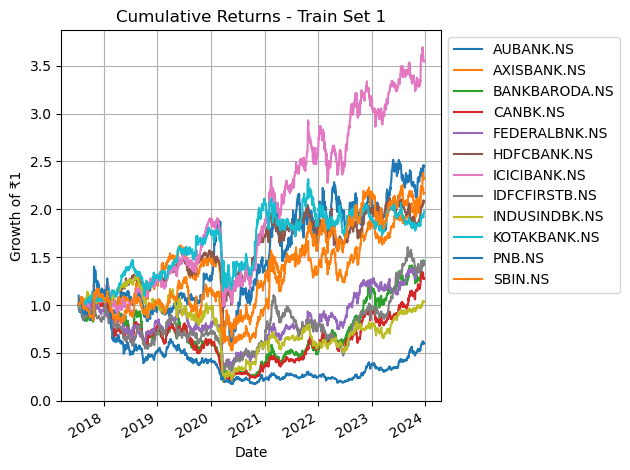

<Figure size 1200x600 with 0 Axes>

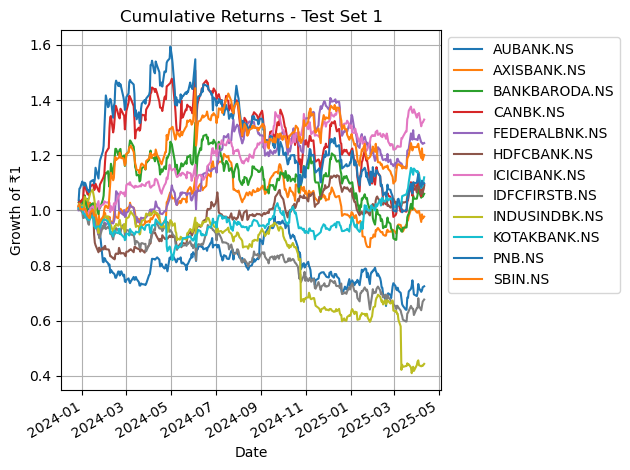


📊 Processing Split 2


<Figure size 1200x600 with 0 Axes>

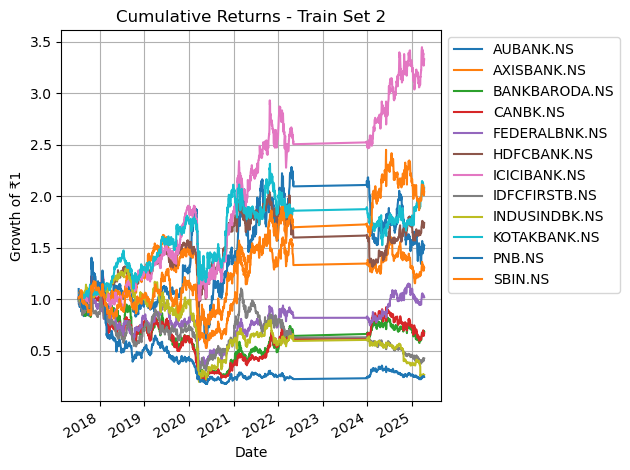

<Figure size 1200x600 with 0 Axes>

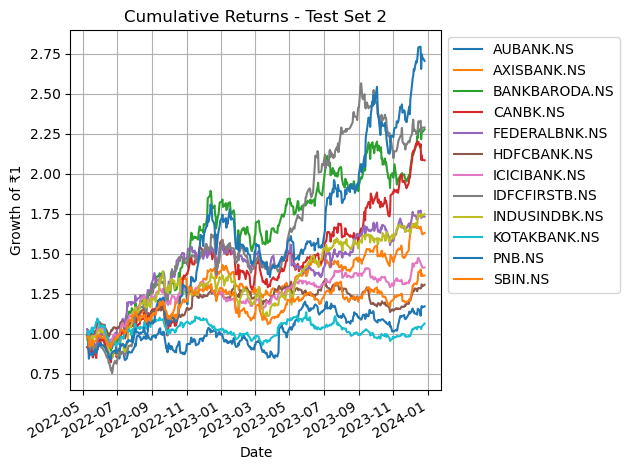


📊 Processing Split 3


<Figure size 1200x600 with 0 Axes>

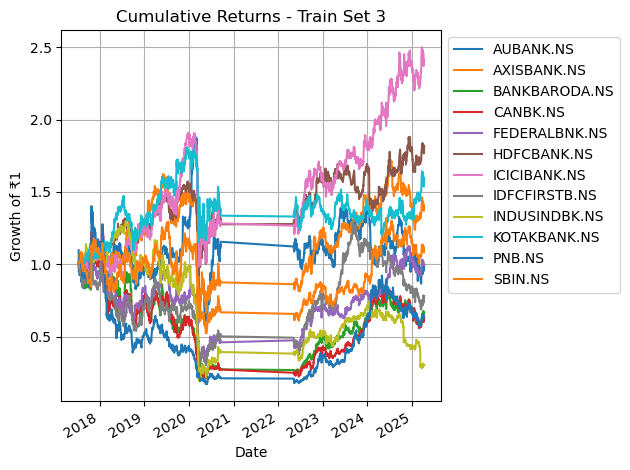

<Figure size 1200x600 with 0 Axes>

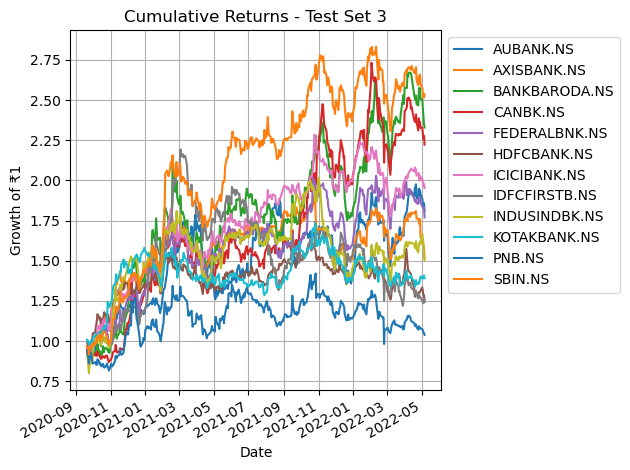


📊 Processing Split 4


<Figure size 1200x600 with 0 Axes>

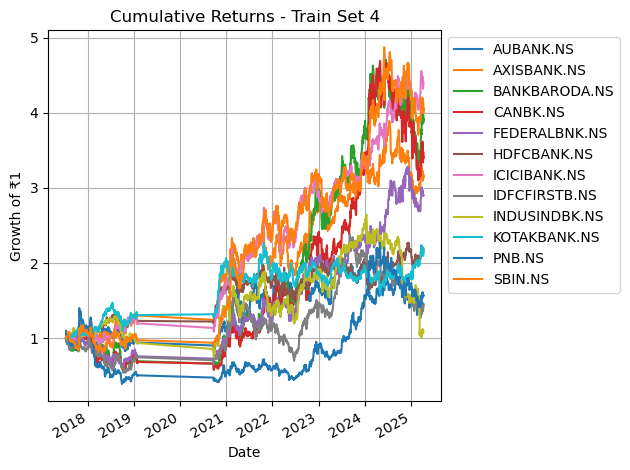

<Figure size 1200x600 with 0 Axes>

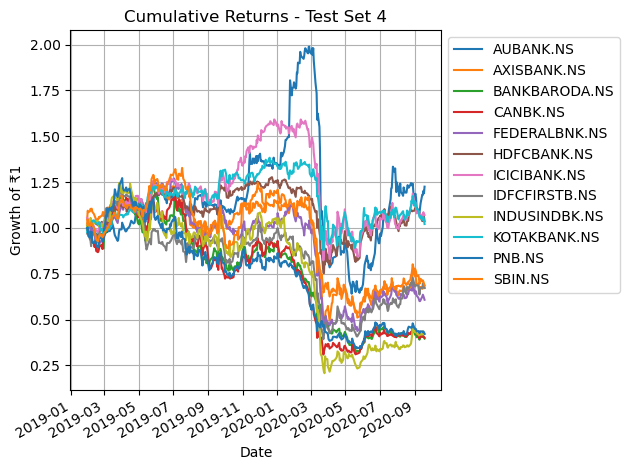


📊 Processing Split 5


<Figure size 1200x600 with 0 Axes>

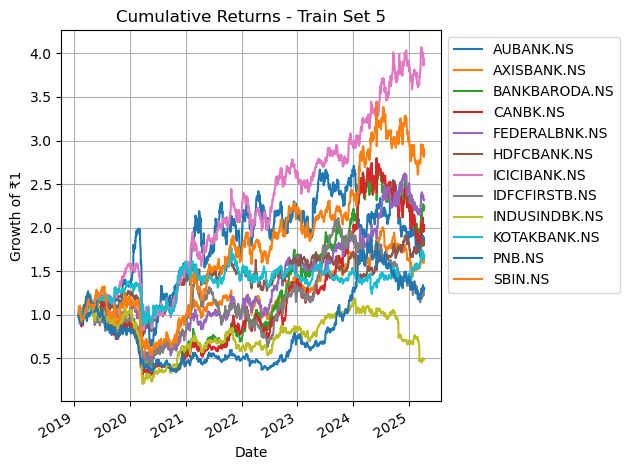

<Figure size 1200x600 with 0 Axes>

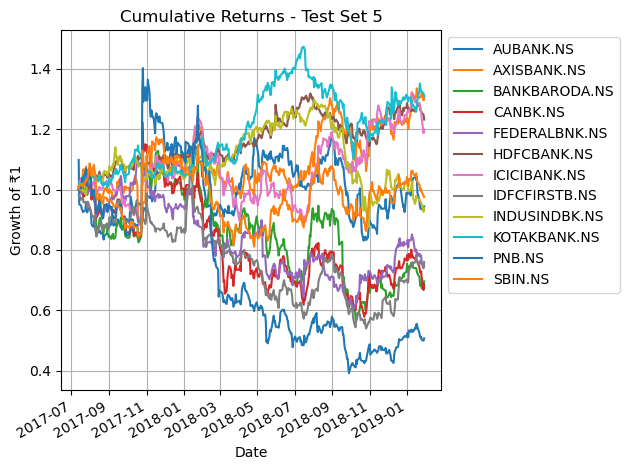

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import os

# ✅ Path to saved data
save_path = "D:/data/All Data/GAN_Multi_Train_Sets"

def plot_cumulative_returns(df, title):
    # Ensure numeric conversion and drop completely non-numeric columns
    df = df.apply(pd.to_numeric, errors='coerce')
    df = df.dropna(axis=1, how='all')  # Drop any stock where all values are NaN
    df = df.dropna(axis=0, how='any')  # Drop rows with missing data
    
    # Extra safety: Check for numeric data
    if df.shape[1] == 0:
        print(f"⚠️ No numeric data available in {title} — skipping plot.")
        return
    
    cum_returns = (1 + df).cumprod()

    plt.figure(figsize=(12, 6))
    cum_returns.plot()
    plt.title(f'Cumulative Returns - {title}')
    plt.ylabel('Growth of ₹1')
    plt.xlabel('Date')
    plt.grid(True)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.show()

# ✅ Plot for all splits
for i in range(1, 6):
    train_df = pd.read_csv(os.path.join(save_path, f"train_set_{i}.csv"), index_col=0, parse_dates=True)
    test_df = pd.read_csv(os.path.join(save_path, f"test_set_{i}.csv"), index_col=0, parse_dates=True)

    print(f"\n📊 Processing Split {i}")
    plot_cumulative_returns(train_df, f"Train Set {i}")
    plot_cumulative_returns(test_df, f"Test Set {i}")


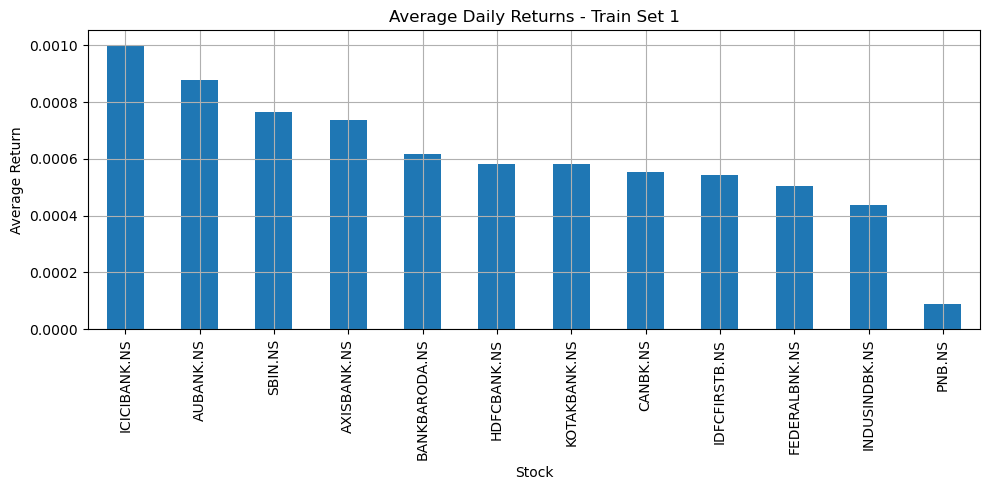

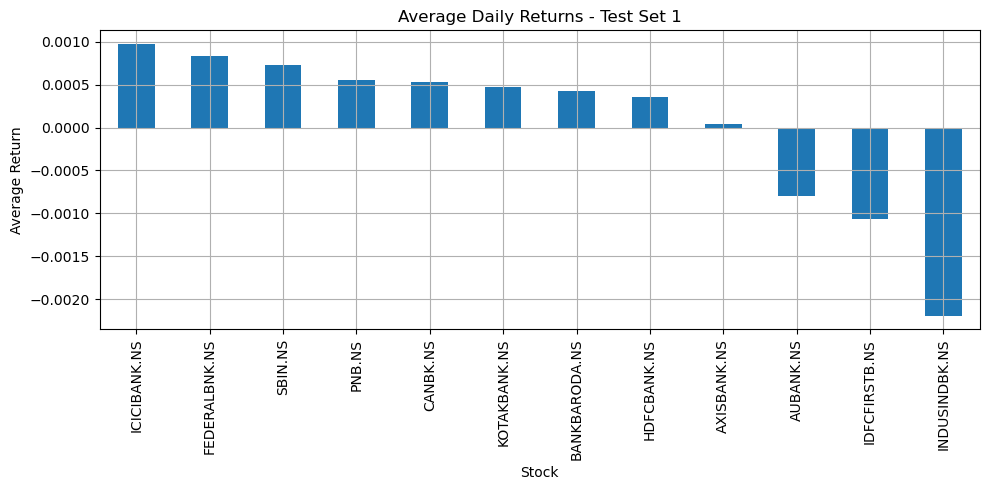

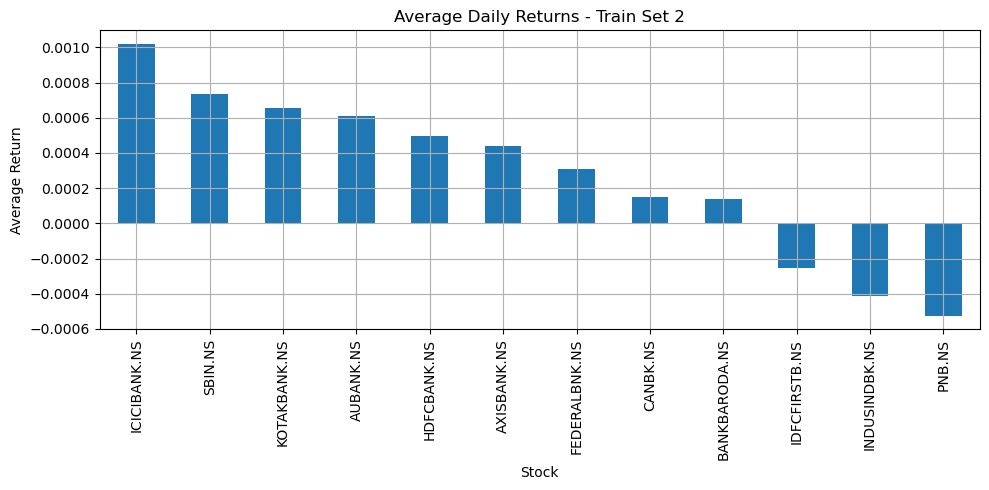

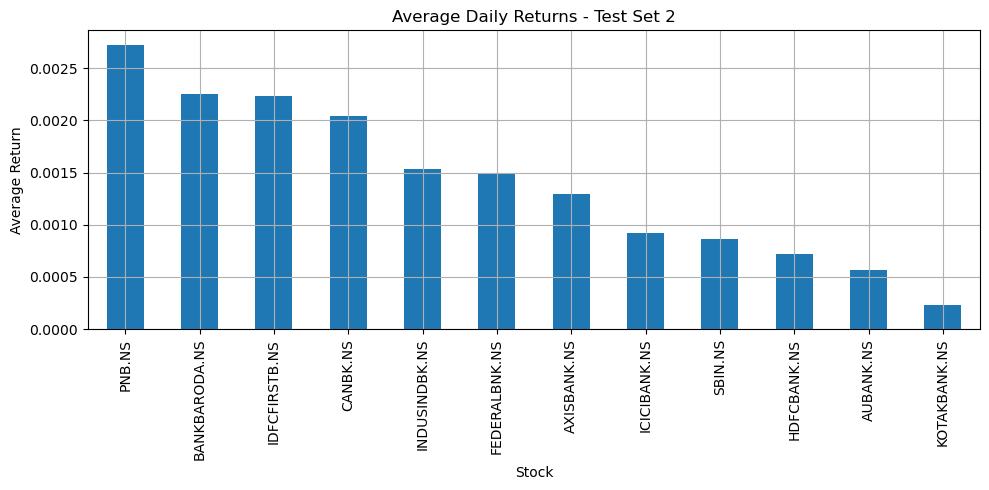

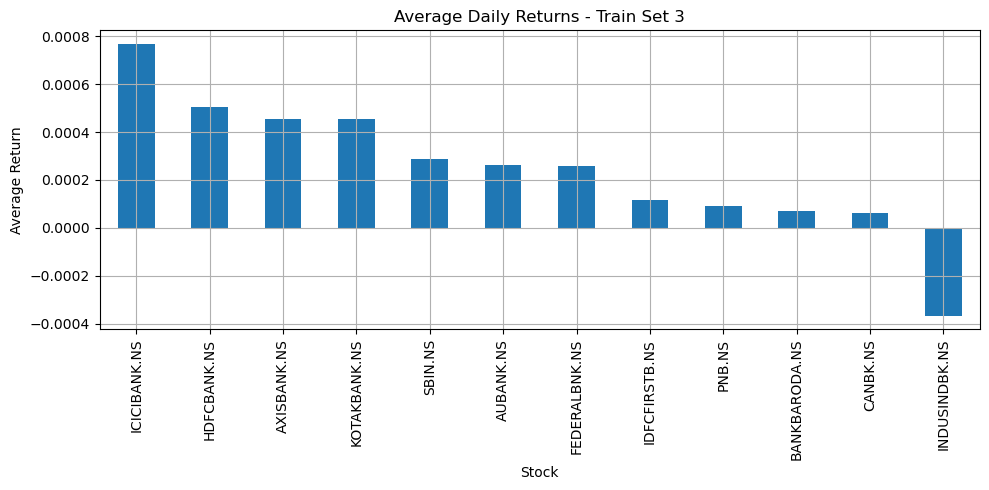

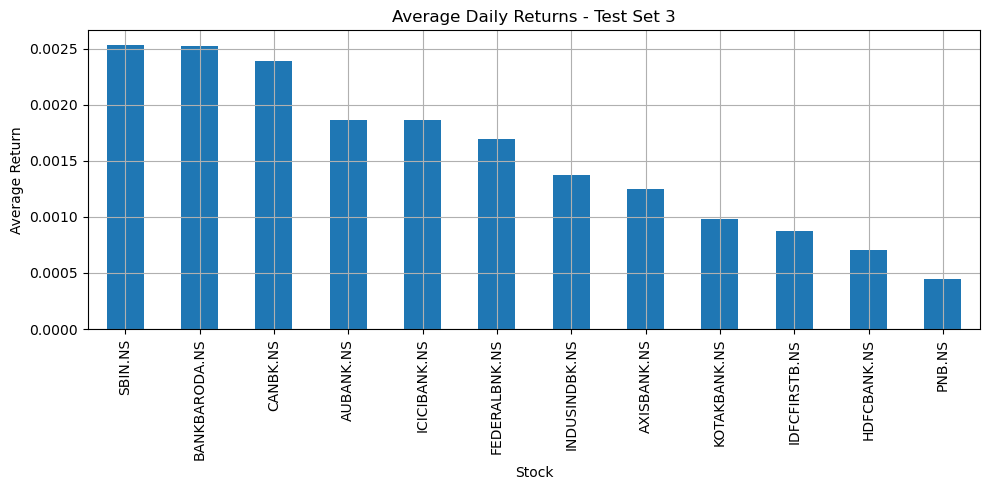

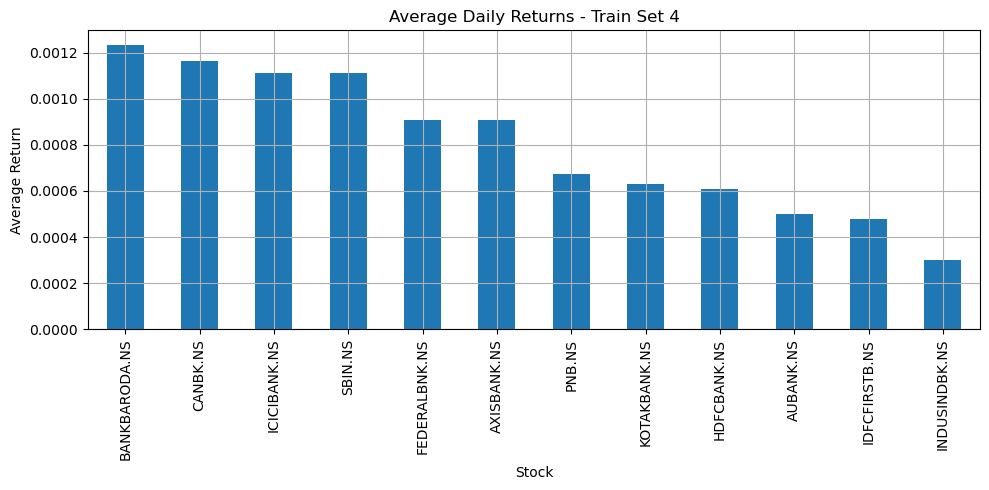

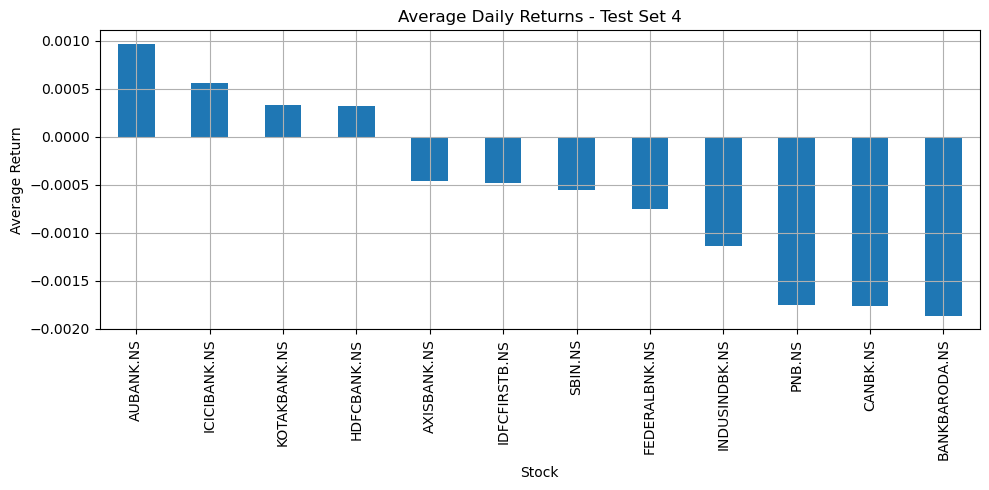

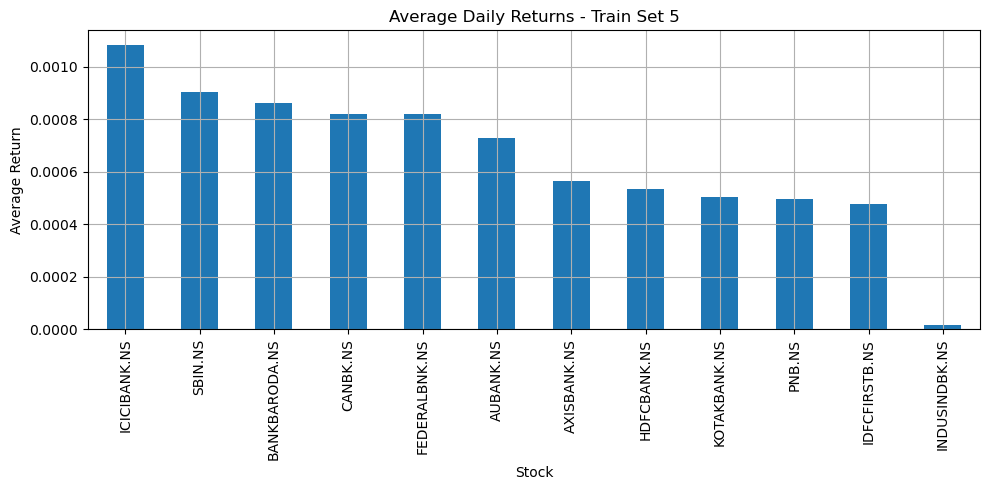

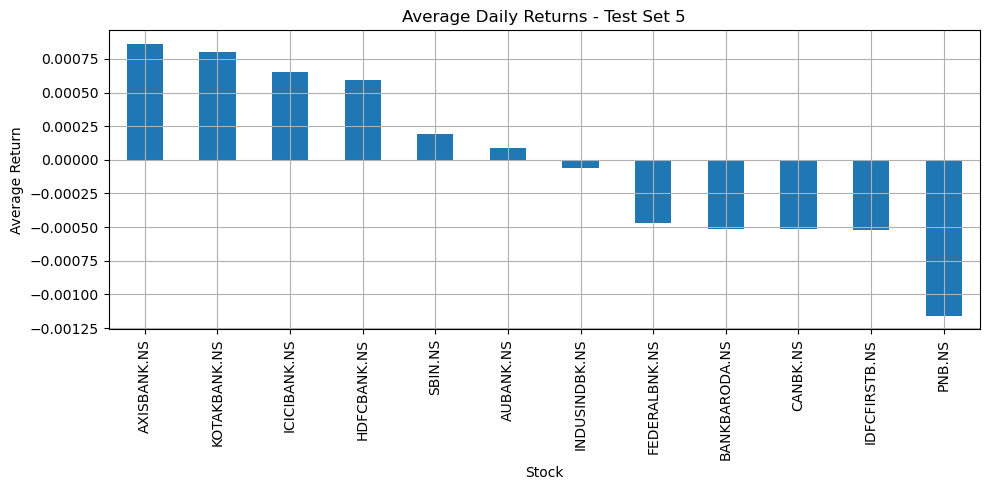

In [5]:
def plot_average_returns(df, title):
    avg_returns = df.mean()
    avg_returns.sort_values(ascending=False).plot(kind='bar', figsize=(10, 5))
    plt.title(f'Average Daily Returns - {title}')
    plt.ylabel('Average Return')
    plt.xlabel('Stock')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

for i in range(1, 6):
    train_df = pd.read_csv(os.path.join(save_path, f"train_set_{i}.csv"), index_col=0)
    test_df = pd.read_csv(os.path.join(save_path, f"test_set_{i}.csv"), index_col=0)

    plot_average_returns(train_df, f'Train Set {i}')
    plot_average_returns(test_df, f'Test Set {i}')


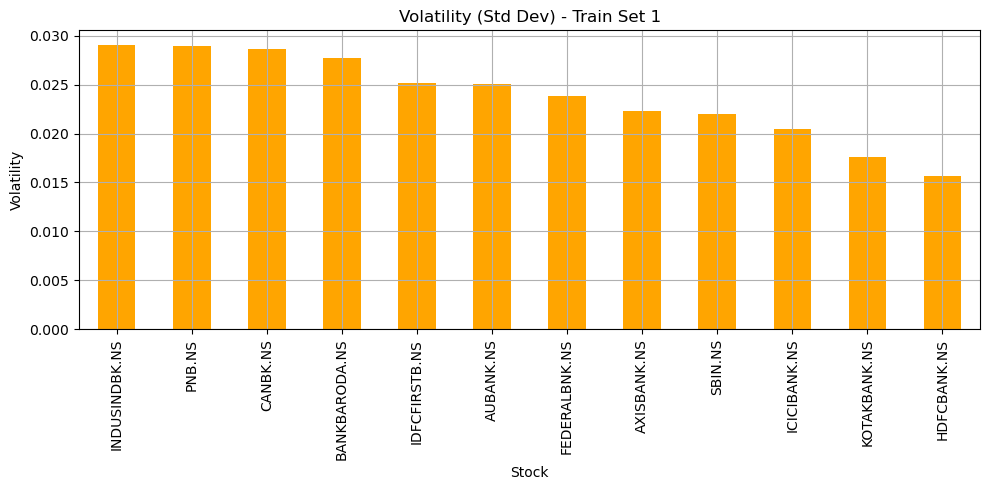

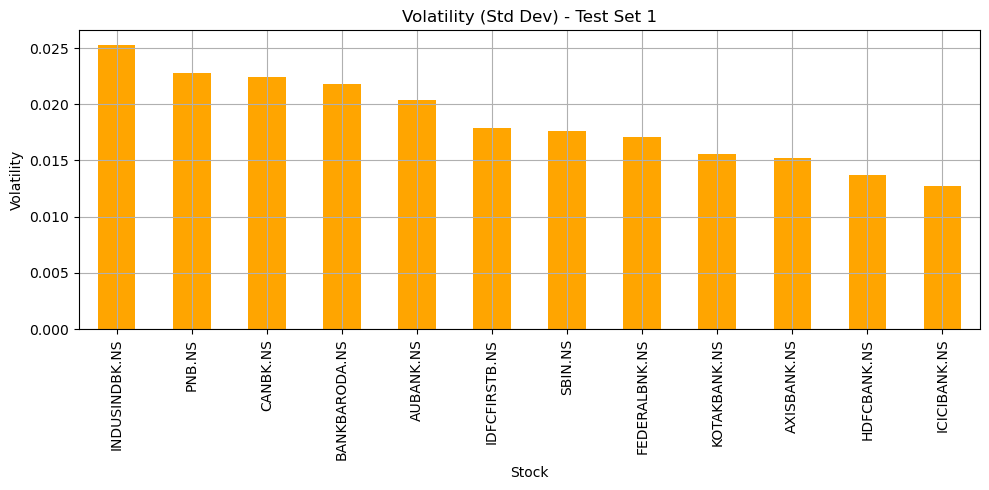

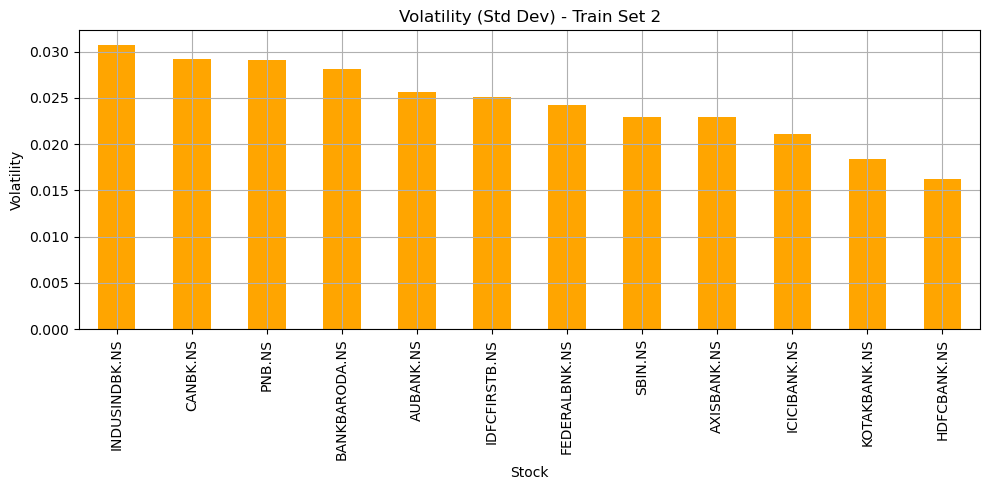

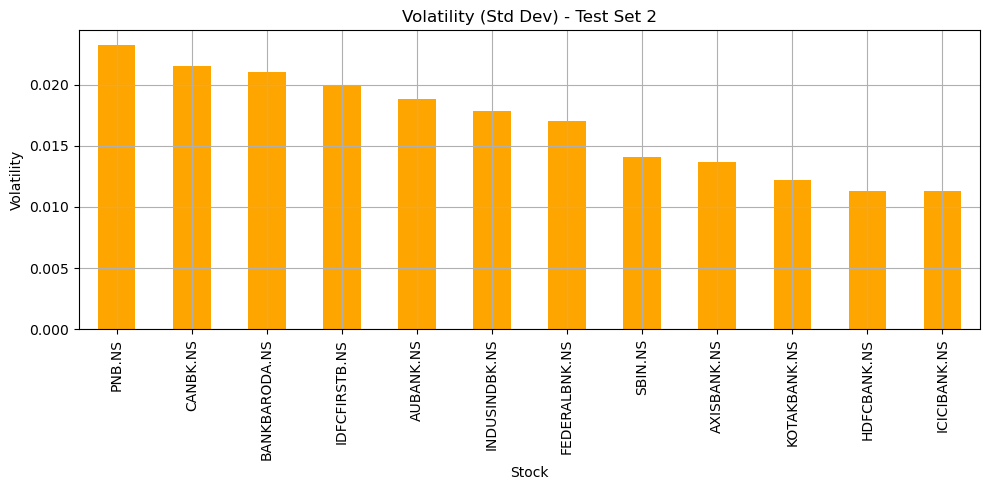

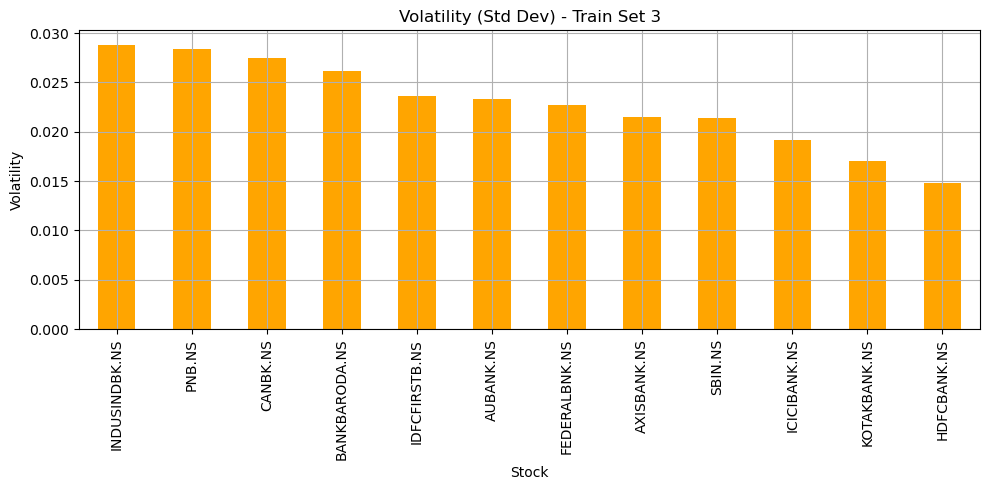

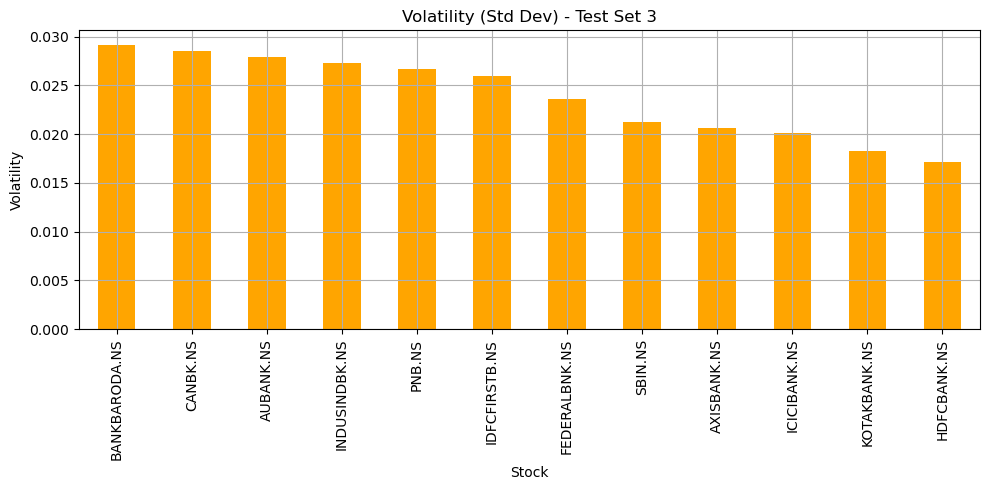

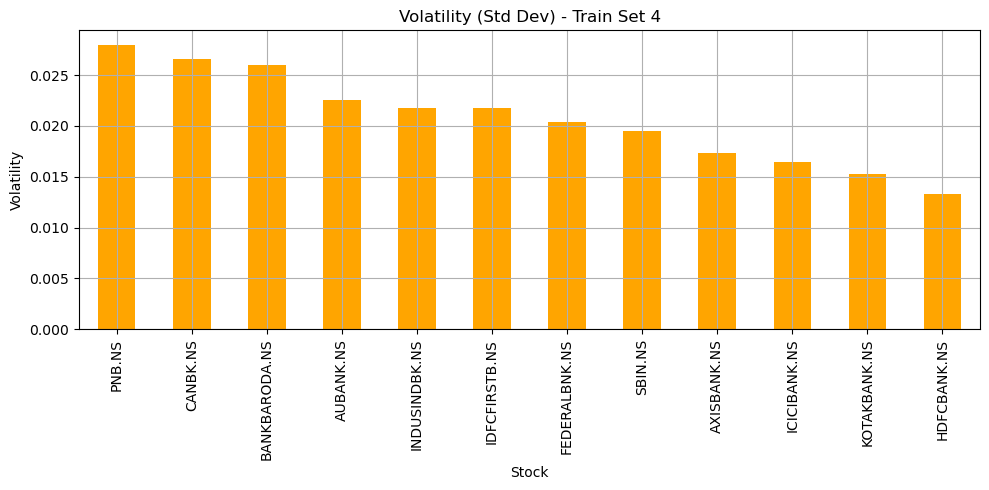

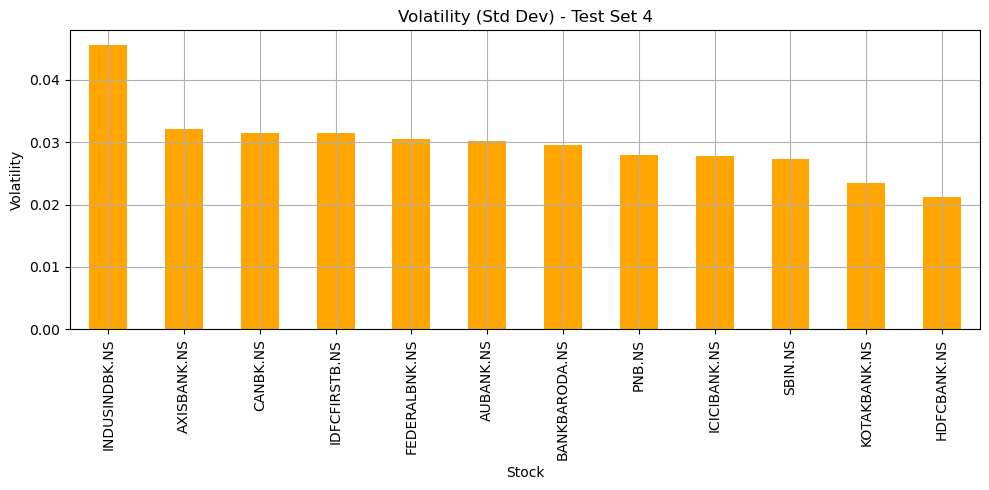

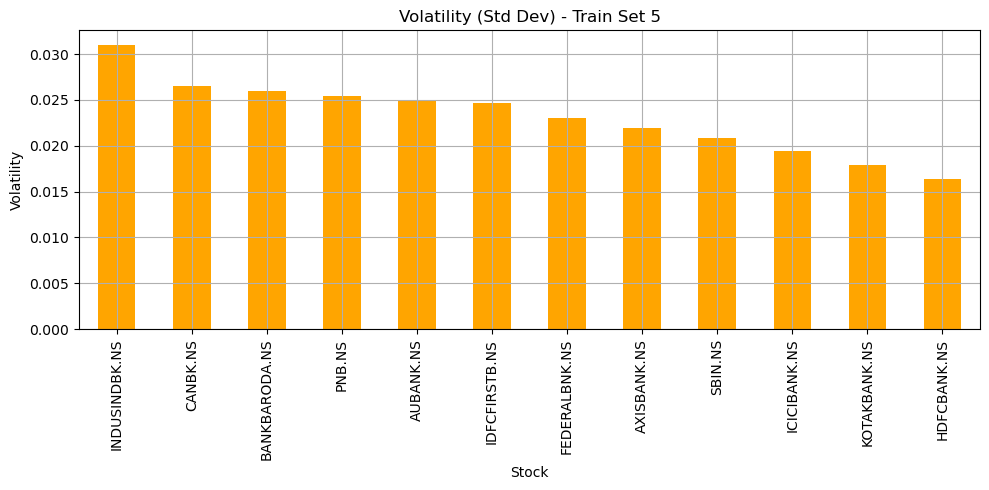

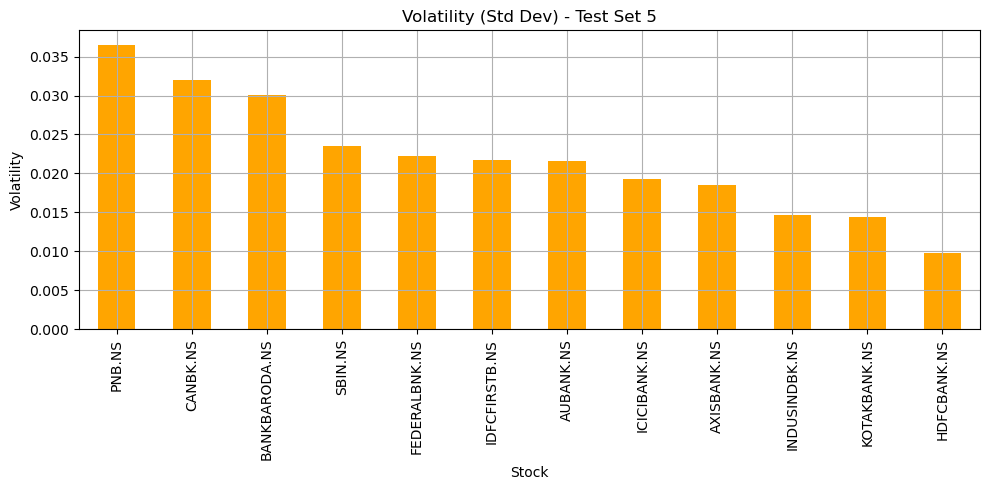

In [7]:
def plot_volatility(df, title):
    volatility = df.std()
    volatility.sort_values(ascending=False).plot(kind='bar', figsize=(10, 5), color='orange')
    plt.title(f'Volatility (Std Dev) - {title}')
    plt.ylabel('Volatility')
    plt.xlabel('Stock')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

for i in range(1, 6):
    train_df = pd.read_csv(os.path.join(save_path, f"train_set_{i}.csv"), index_col=0)
    test_df = pd.read_csv(os.path.join(save_path, f"test_set_{i}.csv"), index_col=0)

    plot_volatility(train_df, f'Train Set {i}')
    plot_volatility(test_df, f'Test Set {i}')


In [8]:
import random

# 🔁 For each train set
for i in range(1, 6):
    train_path = os.path.join(save_path, f"train_set_{i}.csv")
    returns = pd.read_csv(train_path, index_col=0)
    
    num_portfolios = 100
    portfolio_data = []

    for j in range(num_portfolios):
        selected_stocks = random.sample(returns.columns.tolist(), 5)
        port_return = (returns[selected_stocks] * 0.20).sum(axis=1).mean() * 100
        portfolio_data.append([j+1] + selected_stocks + [port_return])

    columns = ["Portfolio_ID", "Stock_1", "Stock_2", "Stock_3", "Stock_4", "Stock_5", "Portfolio_Return (%)"]
    portfolio_df = pd.DataFrame(portfolio_data, columns=columns)
    
    # Save
    port_path = os.path.join(save_path, f"random_portfolios_train_set_{i}.csv")
    portfolio_df.to_csv(port_path, index=False)
    print(f"✅ Portfolios saved for Train Set {i}")


✅ Portfolios saved for Train Set 1
✅ Portfolios saved for Train Set 2
✅ Portfolios saved for Train Set 3
✅ Portfolios saved for Train Set 4
✅ Portfolios saved for Train Set 5


C:\Users\Mohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


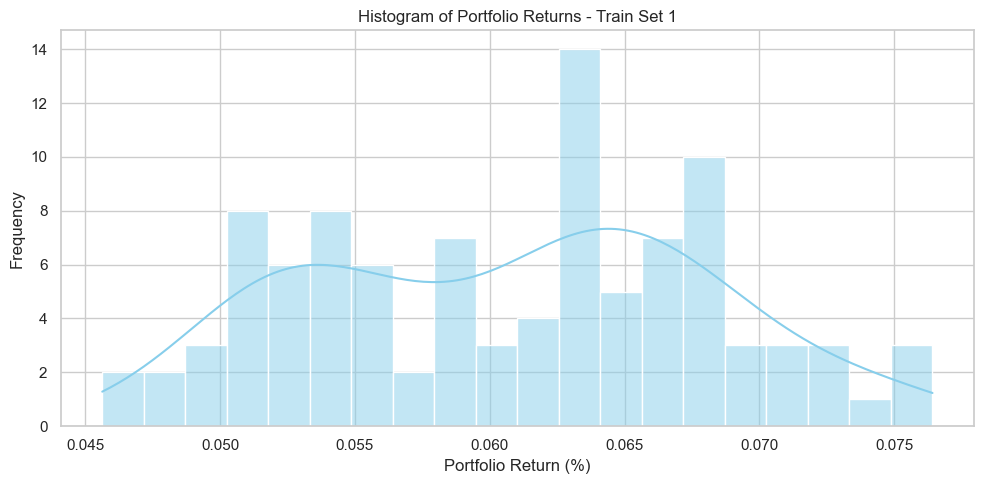

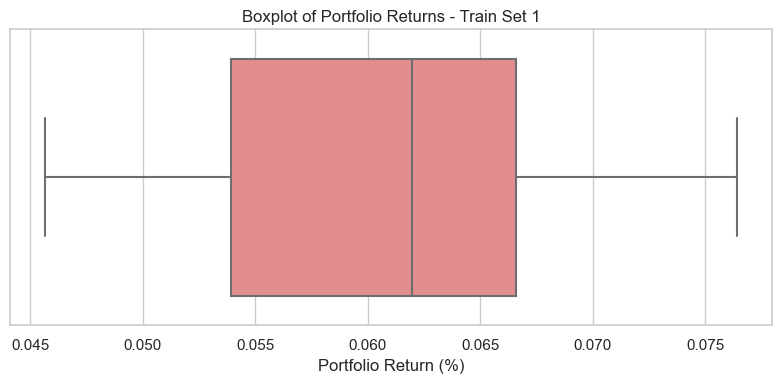

C:\Users\Mohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


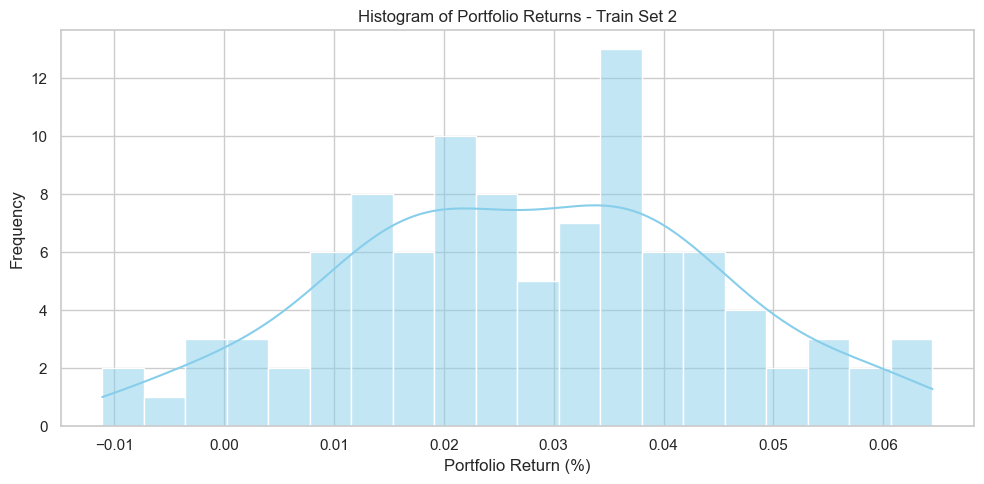

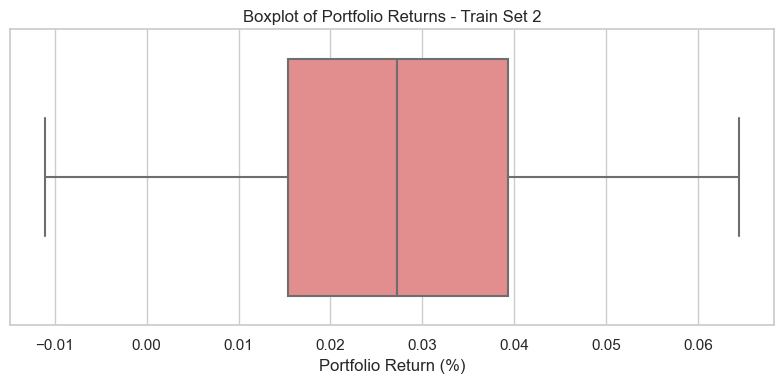

C:\Users\Mohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


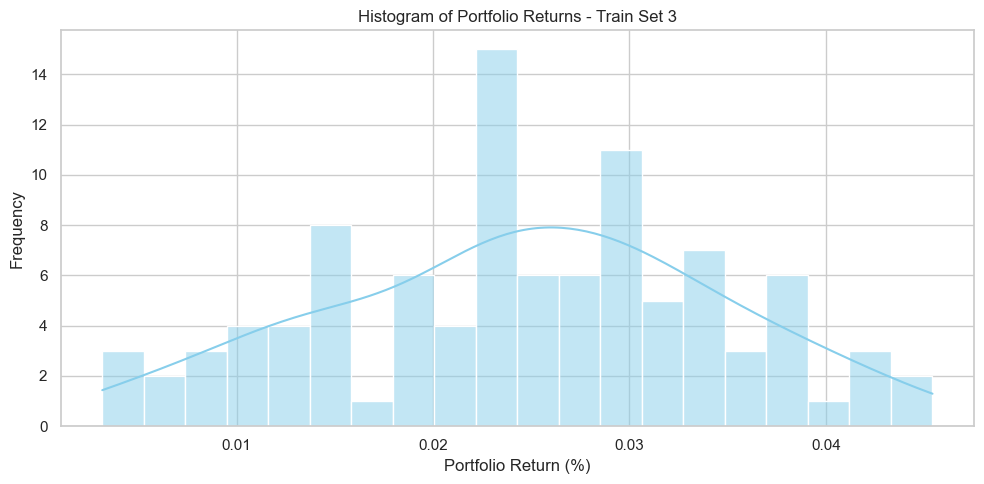

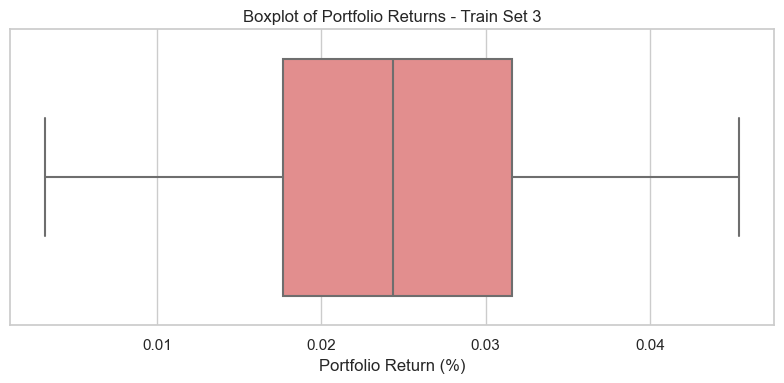

C:\Users\Mohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


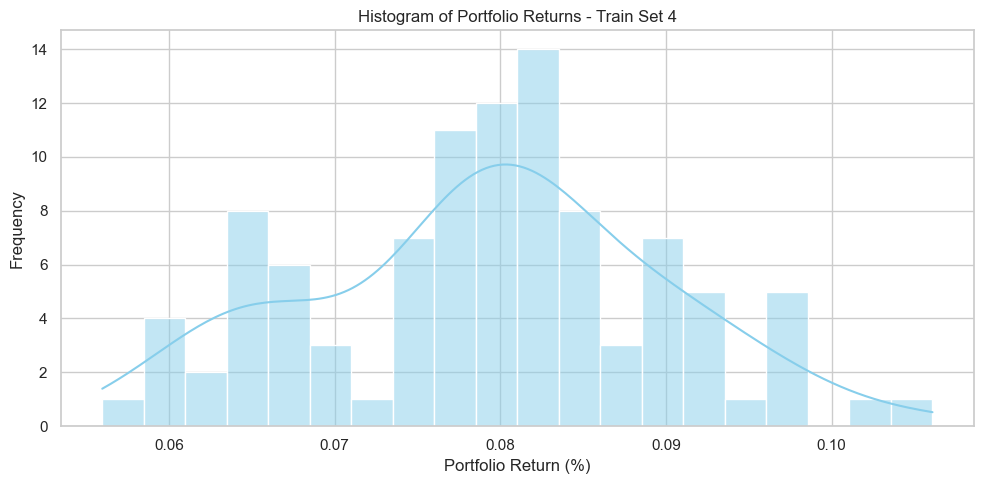

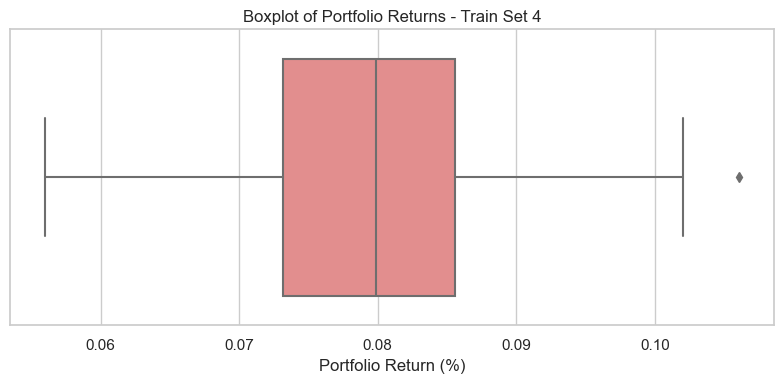

C:\Users\Mohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


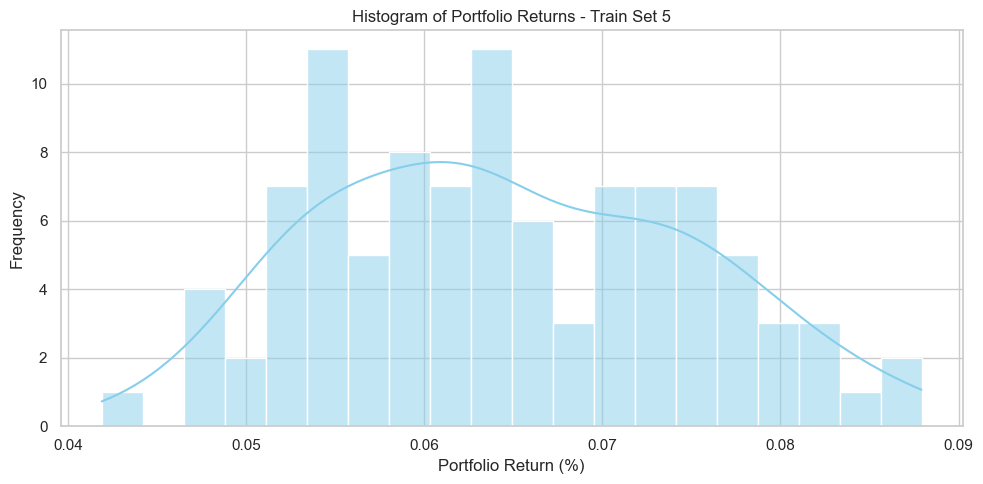

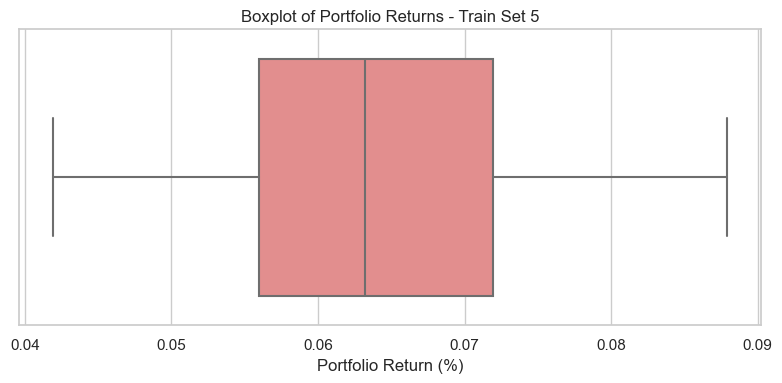

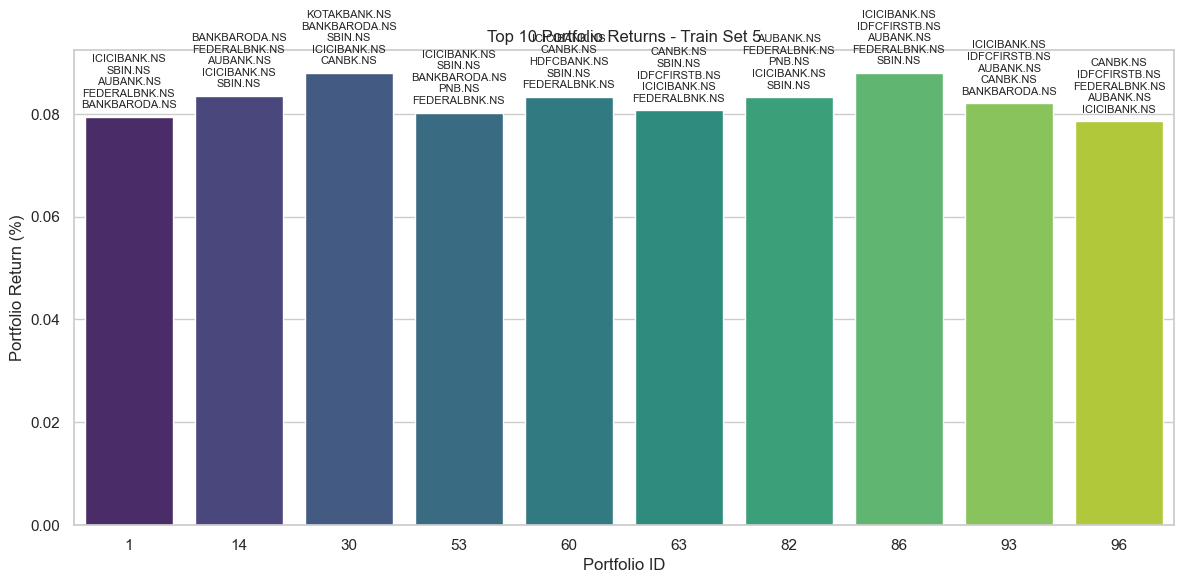

C:\Users\Mohit\AppData\Local\Temp\ipykernel_5232\3025372902.py:83: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from current font.
  plt.tight_layout()
C:\Users\Mohit\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


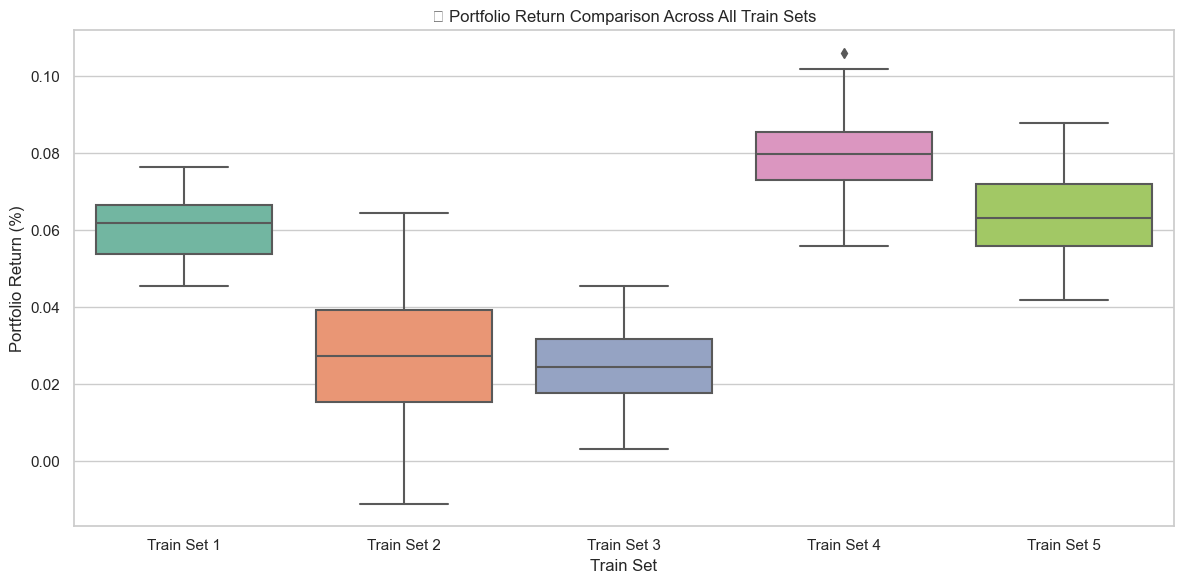

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os

# 📍 Seaborn style
sns.set(style="whitegrid")

# 🗂️ Collect returns for final comparison plot
all_returns = []

# 🔁 Loop over all 5 train sets
for i in range(1, 6):
    # 📄 Load portfolio data
    port_path = os.path.join(save_path, f"random_portfolios_train_set_{i}.csv")
    df = pd.read_csv(port_path)
    df["Train_Set"] = f"Train Set {i}"
    
    # Add to combined dataframe
    all_returns.append(df[["Portfolio_ID", "Portfolio_Return (%)", "Train_Set"]])
    
    # 📈 Histogram
    plt.figure(figsize=(10, 5))
    sns.histplot(df["Portfolio_Return (%)"], kde=True, bins=20, color="skyblue")
    plt.title(f"Histogram of Portfolio Returns - Train Set {i}")
    plt.xlabel("Portfolio Return (%)")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # 📦 Boxplot
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df["Portfolio_Return (%)"], color="lightcoral")
    plt.title(f"Boxplot of Portfolio Returns - Train Set {i}")
    plt.xlabel("Portfolio Return (%)")
    plt.tight_layout()
    plt.show()

    # 🌟 Top 10 portfolios
top_10 = df.sort_values(by="Portfolio_Return (%)", ascending=False).head(10)

plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(
    data=top_10,
    x="Portfolio_ID",
    y="Portfolio_Return (%)",
    palette="viridis"
)

plt.title(f"Top 10 Portfolio Returns - Train Set {i}")
plt.xlabel("Portfolio ID")
plt.ylabel("Portfolio Return (%)")
plt.xticks(rotation=0)

# 📝 Annotate inside/above each bar with stock names
for p, (_, row) in zip(bar_plot.patches, top_10.iterrows()):
    stock_list = '\n'.join([row[f"Stock_{s}"] for s in range(1, 6)])  # One stock per line
    height = p.get_height()
    bar_plot.annotate(
        stock_list,
        (p.get_x() + p.get_width() / 2, height),
        ha='center',
        va='bottom',
        fontsize=8,
        rotation=0,
        xytext=(0, 5),
        textcoords='offset points'
    )

plt.tight_layout()
plt.show()

# 🔗 Combine all returns
combined_df = pd.concat(all_returns, ignore_index=True)

# 📊 Final Boxplot: Compare all train sets
plt.figure(figsize=(12, 6))
sns.boxplot(data=combined_df, x="Train_Set", y="Portfolio_Return (%)", palette="Set2")
plt.title("📦 Portfolio Return Comparison Across All Train Sets")
plt.xlabel("Train Set")
plt.ylabel("Portfolio Return (%)")
plt.tight_layout()
plt.show()


In [12]:
# 🔁 For each train set's portfolio file
best_portfolios = []

for i in range(1, 6):
    file = os.path.join(save_path, f"random_portfolios_train_set_{i}.csv")
    df = pd.read_csv(file)
    best_port = df.loc[df["Portfolio_Return (%)"].idxmax()]
    best_portfolios.append(best_port)
    
    best_df = pd.DataFrame([best_port])
    best_df.to_csv(os.path.join(save_path, f"best_portfolio_train_set_{i}.csv"), index=False)
    print(f"🔥 Best Portfolio from Train Set {i} saved.")


🔥 Best Portfolio from Train Set 1 saved.
🔥 Best Portfolio from Train Set 2 saved.
🔥 Best Portfolio from Train Set 3 saved.
🔥 Best Portfolio from Train Set 4 saved.
🔥 Best Portfolio from Train Set 5 saved.


C:\Users\Mohit\AppData\Local\Temp\ipykernel_5232\3291878133.py:35: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  plt.tight_layout()
C:\Users\Mohit\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


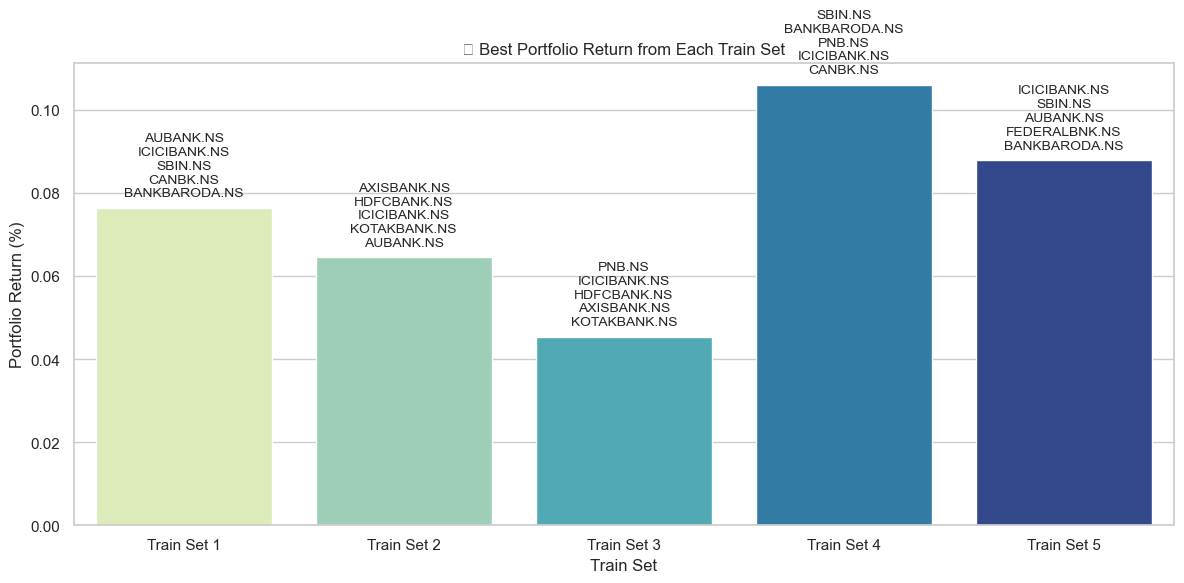

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# 🧱 Create DataFrame from the best portfolios
best_df_all = pd.DataFrame(best_portfolios)
best_df_all["Train_Set"] = [f"Train Set {i}" for i in range(1, 6)]

# 📊 Barplot of Best Portfolio Returns
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(
    data=best_df_all,
    x="Train_Set",
    y="Portfolio_Return (%)",
    palette="YlGnBu"
)

plt.title("🔥 Best Portfolio Return from Each Train Set")
plt.ylabel("Portfolio Return (%)")
plt.xlabel("Train Set")

# 📝 Annotate each bar with stock names
for bar, (_, row) in zip(bar_plot.patches, best_df_all.iterrows()):
    height = bar.get_height()
    stock_list = '\n'.join([row[f"Stock_{i}"] for i in range(1, 6)])  # One per line
    bar_plot.annotate(
        stock_list,
        (bar.get_x() + bar.get_width() / 2, height),
        ha='center',
        va='bottom',
        fontsize=10,
        xytext=(0, 6),  # offset above bar
        textcoords='offset points'
    )

plt.tight_layout()
plt.show()


In [17]:
import torch
import torch.nn as nn
import torch.optim as optim

class Generator(nn.Module):
    def __init__(self, input_dim=10, output_dim=5):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 16),
            nn.ReLU(),
            nn.Linear(16, output_dim),
            nn.Softmax(dim=1)
        )
    def forward(self, x):
        return self.model(x)

class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(1, 16),
            nn.ReLU(),
            nn.Linear(16, 1),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.model(x)

generators = [Generator() for _ in range(5)]
discriminators = [Discriminator() for _ in range(5)]


In [18]:
criterion = nn.BCELoss()

for i in range(5):
    disc = discriminators[i]
    optimizer_D = optim.Adam(disc.parameters(), lr=0.01)
    
    best_return = best_portfolios[i]["Portfolio_Return (%)"]
    
    for step in range(100):
        real = torch.tensor([[best_return]], dtype=torch.float32)
        fake = torch.tensor([[random.uniform(0, best_return)]], dtype=torch.float32)
        
        label_real = torch.tensor([[1.0]])
        label_fake = torch.tensor([[0.0]])

        optimizer_D.zero_grad()
        loss_real = criterion(disc(real), label_real)
        loss_fake = criterion(disc(fake), label_fake)
        loss = (loss_real + loss_fake) / 2
        loss.backward()
        optimizer_D.step()

    print(f"✅ Discriminator {i+1} pre-trained.")


✅ Discriminator 1 pre-trained.
✅ Discriminator 2 pre-trained.
✅ Discriminator 3 pre-trained.
✅ Discriminator 4 pre-trained.
✅ Discriminator 5 pre-trained.


In [20]:
import numpy as np
num_epochs = 20000

for i in range(5):
    gen = generators[i]
    disc = discriminators[i]

    optimizer_G = optim.Adam(gen.parameters(), lr=0.01)
    optimizer_D = optim.Adam(disc.parameters(), lr=0.01)

    best_return = best_portfolios[i]["Portfolio_Return (%)"]
    returns_df = pd.read_csv(os.path.join(save_path, f"train_set_{i+1}.csv"), index_col=0)

    best_gan_return = -float("inf")
    best_weights, best_stocks = None, None

    for epoch in range(num_epochs):
        # === Generate Portfolio ===
        noise = torch.randn(1, 10)
        weights = gen(noise).detach().numpy().flatten()
        stocks = random.sample(returns_df.columns.tolist(), 5)
        avg_returns = returns_df[stocks].mean().values
        gan_return = np.sum(weights * avg_returns) * 100
        gan_tensor = torch.tensor([[gan_return]], dtype=torch.float32)

        # === Train Discriminator ===
        optimizer_D.zero_grad()
        real_tensor = torch.tensor([[best_return]], dtype=torch.float32)
        d_real = disc(real_tensor)
        d_fake = disc(gan_tensor.detach())
        loss_D = (criterion(d_real, torch.tensor([[1.0]])) +
                  criterion(d_fake, torch.tensor([[0.0]]))) / 2
        loss_D.backward()
        optimizer_D.step()

        # === Train Generator ===
        optimizer_G.zero_grad()
        d_fake = disc(gan_tensor)
        loss_G = criterion(d_fake, torch.tensor([[1.0]]))
        loss_G.backward()
        optimizer_G.step()

        if gan_return > best_gan_return:
            best_gan_return = gan_return
            best_weights = weights
            best_stocks = stocks

        if epoch % 500 == 0:
            print(f"[{i+1}-{epoch}] GAN Return: {gan_return:.2f}% | Best: {best_gan_return:.2f}%")

    # Save results
    df = pd.DataFrame([best_stocks + list(best_weights) + [best_gan_return]],
                      columns=[f"Stock_{j+1}" for j in range(5)] + 
                              [f"Weight_{j+1}" for j in range(5)] + 
                              ["GAN_Portfolio_Return (%)"])
    df.to_csv(os.path.join(save_path, f"best_gan_portfolio_train_set_{i+1}.csv"), index=False)
    print(f"\n🎯 GAN Portfolio for Train Set {i+1} saved.")


[1-0] GAN Return: 0.05% | Best: 0.05%
[1-500] GAN Return: 0.05% | Best: 0.08%
[1-1000] GAN Return: 0.08% | Best: 0.08%
[1-1500] GAN Return: 0.06% | Best: 0.08%

🎯 GAN Portfolio for Train Set 1 saved.
[2-0] GAN Return: 0.04% | Best: 0.04%
[2-500] GAN Return: 0.04% | Best: 0.07%
[2-1000] GAN Return: 0.01% | Best: 0.07%
[2-1500] GAN Return: 0.04% | Best: 0.07%

🎯 GAN Portfolio for Train Set 2 saved.
[3-0] GAN Return: 0.03% | Best: 0.03%
[3-500] GAN Return: 0.02% | Best: 0.04%
[3-1000] GAN Return: 0.02% | Best: 0.05%
[3-1500] GAN Return: 0.02% | Best: 0.05%

🎯 GAN Portfolio for Train Set 3 saved.
[4-0] GAN Return: 0.07% | Best: 0.07%
[4-500] GAN Return: 0.10% | Best: 0.11%
[4-1000] GAN Return: 0.07% | Best: 0.11%
[4-1500] GAN Return: 0.09% | Best: 0.11%

🎯 GAN Portfolio for Train Set 4 saved.
[5-0] GAN Return: 0.08% | Best: 0.08%
[5-500] GAN Return: 0.07% | Best: 0.09%
[5-1000] GAN Return: 0.07% | Best: 0.09%
[5-1500] GAN Return: 0.08% | Best: 0.09%

🎯 GAN Portfolio for Train Set 5 saved.


In [23]:
comparison_results = []

for i in range(1, 6):
    # Load historical best portfolio
    hist_path = os.path.join(save_path, f"best_portfolio_train_set_{i}.csv")
    hist_df = pd.read_csv(hist_path)

    # Load GAN portfolio
    gan_path = os.path.join(save_path, f"best_gan_portfolio_train_set_{i}.csv")
    gan_df = pd.read_csv(gan_path)

    # Extract returns
    hist_return = hist_df["Portfolio_Return (%)"].values[0]
    gan_return = gan_df["GAN_Portfolio_Return (%)"].values[0]

    # Store comparison
    comparison_results.append({
        "Set": f"Train_Set_{i}",
        "Historical_Return (%)": hist_return,
        "GAN_Return (%)": gan_return,
        "Hist_Stocks": hist_df.loc[0, ["Stock_1", "Stock_2", "Stock_3", "Stock_4", "Stock_5"]].tolist(),
        "GAN_Stocks": gan_df.loc[0, ["Stock_1", "Stock_2", "Stock_3", "Stock_4", "Stock_5"]].tolist(),
        "GAN_Weights": gan_df.loc[0, ["Weight_1", "Weight_2", "Weight_3", "Weight_4", "Weight_5"]].tolist()
    })

comparison_df = pd.DataFrame(comparison_results)

# Just return comparison of returns
print(comparison_df[["Set", "Historical_Return (%)", "GAN_Return (%)"]])

comparison_df.to_csv(os.path.join(save_path, "historical_vs_gan_comparison.csv"), index=False)
print("📊 Saved comparison to 'historical_vs_gan_comparison.csv'")




           Set  Historical_Return (%)  GAN_Return (%)
0  Train_Set_1               0.076414        0.082421
1  Train_Set_2               0.064470        0.073018
2  Train_Set_3               0.045426        0.051391
3  Train_Set_4               0.106085        0.111380
4  Train_Set_5               0.087920        0.090520
📊 Saved comparison to 'historical_vs_gan_comparison.csv'


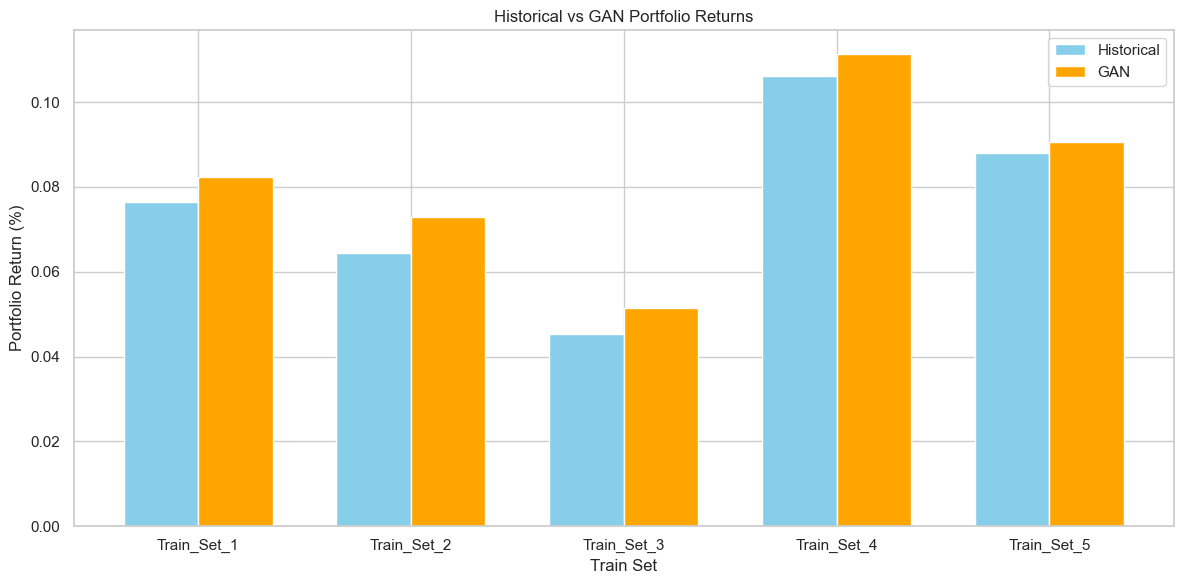

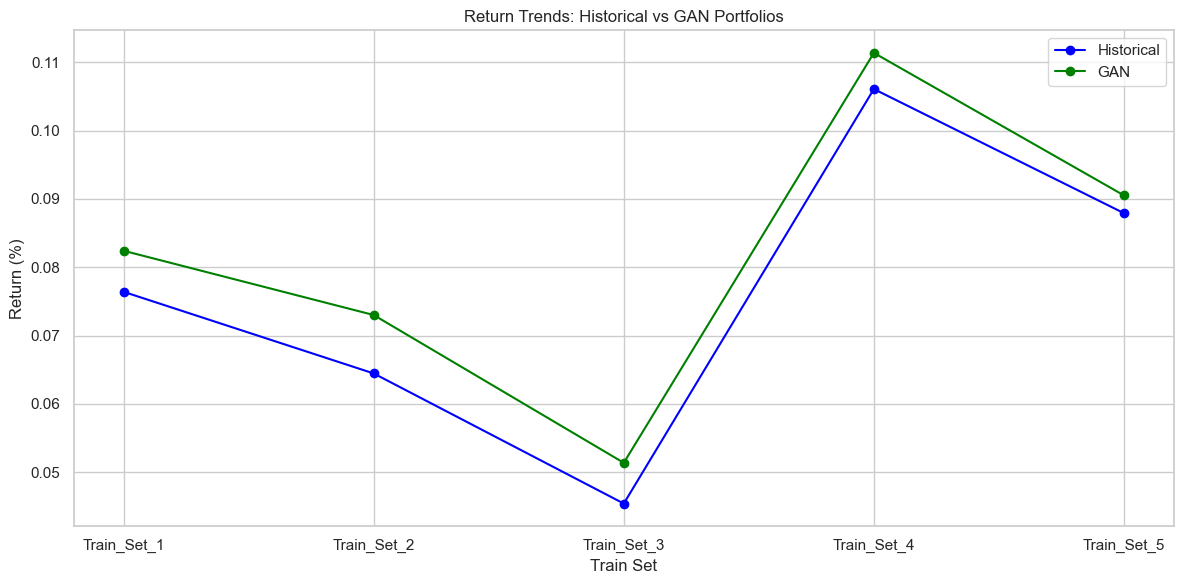

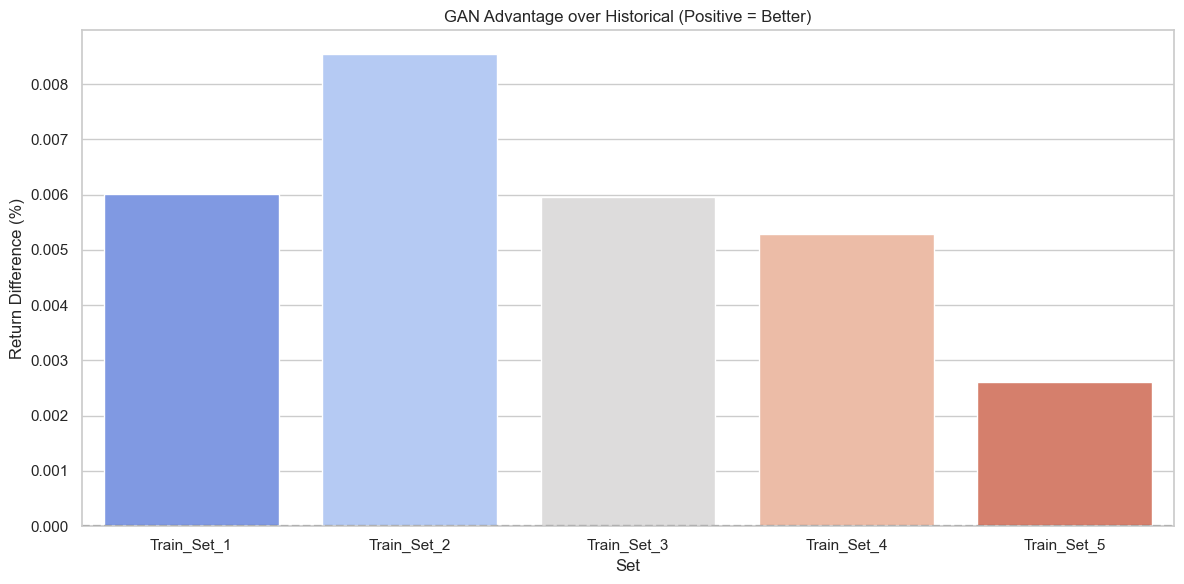

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Convert Set to categorical for consistent sorting
comparison_df["Set"] = pd.Categorical(comparison_df["Set"], categories=[f"Train_Set_{i}" for i in range(1, 6)], ordered=True)

# 1️⃣ Bar Plot: Historical vs GAN Return Comparison
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = range(len(comparison_df))

plt.bar(index, comparison_df["Historical_Return (%)"], bar_width, label='Historical', color='skyblue')
plt.bar([i + bar_width for i in index], comparison_df["GAN_Return (%)"], bar_width, label='GAN', color='orange')

plt.xlabel('Train Set')
plt.ylabel('Portfolio Return (%)')
plt.title('Historical vs GAN Portfolio Returns')
plt.xticks([i + bar_width / 2 for i in index], comparison_df["Set"])
plt.legend()
plt.tight_layout()
plt.show()

# 2️⃣ Line Plot: Trend of Returns
plt.figure(figsize=(12, 6))
plt.plot(comparison_df["Set"], comparison_df["Historical_Return (%)"], marker='o', label='Historical', color='blue')
plt.plot(comparison_df["Set"], comparison_df["GAN_Return (%)"], marker='o', label='GAN', color='green')
plt.title("Return Trends: Historical vs GAN Portfolios")
plt.ylabel("Return (%)")
plt.xlabel("Train Set")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 3️⃣ Difference Plot
comparison_df["Return_Diff (%)"] = comparison_df["GAN_Return (%)"] - comparison_df["Historical_Return (%)"]

plt.figure(figsize=(12, 6))
sns.barplot(x="Set", y="Return_Diff (%)", data=comparison_df, palette="coolwarm")
plt.axhline(0, color='black', linestyle='--')
plt.title("GAN Advantage over Historical (Positive = Better)")
plt.ylabel("Return Difference (%)")
plt.tight_layout()
plt.show()


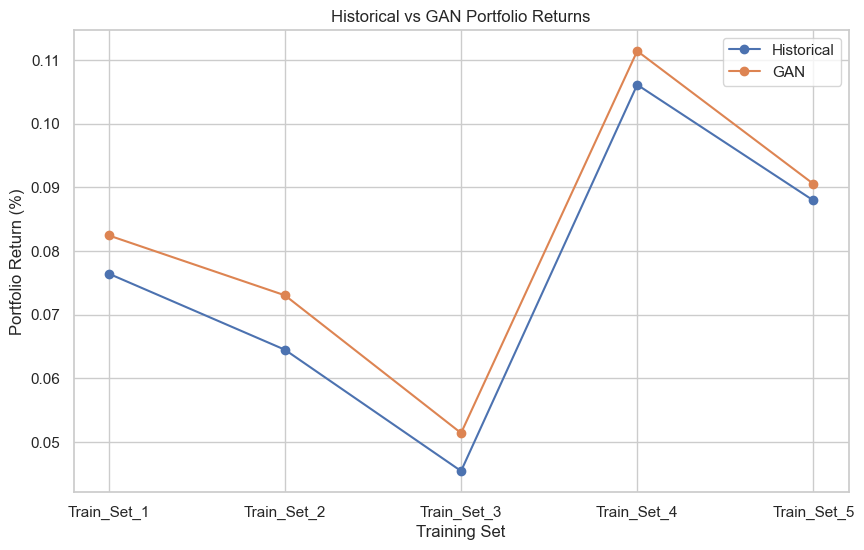

In [27]:
import matplotlib.pyplot as plt

x = comparison_df["Set"]
hist = comparison_df["Historical_Return (%)"]
gan = comparison_df["GAN_Return (%)"]

plt.figure(figsize=(10, 6))
plt.plot(x, hist, label="Historical", marker='o')
plt.plot(x, gan, label="GAN", marker='o')
plt.title("Historical vs GAN Portfolio Returns")
plt.xlabel("Training Set")
plt.ylabel("Portfolio Return (%)")
plt.legend()
plt.grid(True)
plt.show()


In [29]:
import pandas as pd

# ✅ Path to the saved file
file_path = "D:/data/All Data/GAN_Multi_Train_Sets/historical_vs_gan_comparison.csv"

# ✅ Load the comparison CSV into a DataFrame
comparison_df = pd.read_csv(file_path)

# ✅ Display the DataFrame
comparison_df


,Set,Historical_Return (%),GAN_Return (%),Hist_Stocks,GAN_Stocks,GAN_Weights
0,Train_Set_1,0.076414,0.082421,"['AUBANK.NS', 'ICICIBANK.NS', 'SBIN.NS', 'CANB...","['ICICIBANK.NS', 'IDFCFIRSTB.NS', 'AXISBANK.NS...","[0.23805176, 0.12097689, 0.19120021, 0.1486682..."
1,Train_Set_2,0.064470,0.073018,"['AXISBANK.NS', 'HDFCBANK.NS', 'ICICIBANK.NS',...","['KOTAKBANK.NS', 'AUBANK.NS', 'HDFCBANK.NS', '...","[0.13056767, 0.27883217, 0.14878769, 0.1735643..."
2,Train_Set_3,0.045426,0.051391,"['PNB.NS', 'ICICIBANK.NS', 'HDFCBANK.NS', 'AXI...","['KOTAKBANK.NS', 'SBIN.NS', 'ICICIBANK.NS', 'H...","[0.2081432, 0.15680143, 0.24559498, 0.1734531,..."
3,Train_Set_4,0.106085,0.111380,"['SBIN.NS', 'BANKBARODA.NS', 'PNB.NS', 'ICICIB...","['SBIN.NS', 'BANKBARODA.NS', 'AXISBANK.NS', 'I...","[0.28226718, 0.21534719, 0.1620347, 0.20312308..."
4,Train_Set_5,0.087920,0.090520,"['ICICIBANK.NS', 'SBIN.NS', 'AUBANK.NS', 'FEDE...","['PNB.NS', 'ICICIBANK.NS', 'BANKBARODA.NS', 'S...","[0.10923359, 0.3647237, 0.14249508, 0.21936172..."


In [31]:
import pandas as pd
import os

# ✅ Base path
base_path = "D:/data/All Data/GAN_Multi_Train_Sets"

# ✅ Loop through each of the 5 train-test splits
results = []
for i in range(1, 6):
    # Load test set
    test_df = pd.read_csv(os.path.join(base_path, f"test_set_{i}.csv"), index_col=0)
    
    # Load historical best and GAN best portfolios
    best_hist = pd.read_csv(os.path.join(base_path, f"best_portfolio_train_set_{i}.csv"))
    best_gan = pd.read_csv(os.path.join(base_path, f"best_gan_portfolio_train_set_{i}.csv"))

    # Extract stock tickers
    hist_stocks = best_hist.iloc[0][["Stock_1", "Stock_2", "Stock_3", "Stock_4", "Stock_5"]].values
    gan_stocks = best_gan.iloc[0][["Stock_1", "Stock_2", "Stock_3", "Stock_4", "Stock_5"]].values
    gan_weights = best_gan.iloc[0][["Weight_1", "Weight_2", "Weight_3", "Weight_4", "Weight_5"]].values

    # Calculate test return for historical portfolio (equal weights)
    hist_test_return = (test_df[hist_stocks] * 0.20).sum(axis=1).mean() * 100

    # Calculate test return for GAN portfolio (custom weights)
    gan_test_return = (test_df[gan_stocks] * gan_weights).sum(axis=1).mean() * 100

    # Store the results
    results.append({
        "Split": f"Set_{i}",
        "Historical_Stocks": ", ".join(hist_stocks),
        "Historical_Test_Return (%)": hist_test_return,
        "GAN_Stocks": ", ".join(gan_stocks),
        "GAN_Weights": ", ".join([f"{w:.2f}" for w in gan_weights]),
        "GAN_Test_Return (%)": gan_test_return
    })

# ✅ Convert to DataFrame and display
comparison_df = pd.DataFrame(results)
print("\n📊 Comparison of Historical vs GAN Portfolios on Test Sets")
print(comparison_df)

# ✅ Save the comparison
comparison_df.to_csv(os.path.join(base_path, "test_performance_comparison.csv"), index=False)
print("\n✅ Comparison saved as test_performance_comparison.csv")



📊 Comparison of Historical vs GAN Portfolios on Test Sets
   Split                                  Historical_Stocks  \
0  Set_1  AUBANK.NS, ICICIBANK.NS, SBIN.NS, CANBK.NS, BA...   
1  Set_2  AXISBANK.NS, HDFCBANK.NS, ICICIBANK.NS, KOTAKB...   
2  Set_3  PNB.NS, ICICIBANK.NS, HDFCBANK.NS, AXISBANK.NS...   
3  Set_4  SBIN.NS, BANKBARODA.NS, PNB.NS, ICICIBANK.NS, ...   
4  Set_5  ICICIBANK.NS, SBIN.NS, AUBANK.NS, FEDERALBNK.N...   

   Historical_Test_Return (%)  \
0                    0.037285   
1                    0.074631   
2                    0.104925   
3                   -0.107522   
4                   -0.001035   

                                          GAN_Stocks  \
0  ICICIBANK.NS, IDFCFIRSTB.NS, AXISBANK.NS, SBIN...   
1  KOTAKBANK.NS, AUBANK.NS, HDFCBANK.NS, SBIN.NS,...   
2  KOTAKBANK.NS, SBIN.NS, ICICIBANK.NS, HDFCBANK....   
3  SBIN.NS, BANKBARODA.NS, AXISBANK.NS, ICICIBANK...   
4  PNB.NS, ICICIBANK.NS, BANKBARODA.NS, SBIN.NS, ...   

                    GAN_We

,Split,Historical_Stocks,Historical_Test_Return (%),GAN_Stocks,GAN_Weights,GAN_Test_Return (%),Return_Difference (%)
0,Set_1,"AUBANK.NS, ICICIBANK.NS, SBIN.NS, CANBK.NS, BANKBARODA.NS",0.04,"ICICIBANK.NS, IDFCFIRSTB.NS, AXISBANK.NS, SBIN.NS, AUBANK.NS","0.24, 0.12, 0.19, 0.15, 0.30",-0.00,-0.04
1,Set_2,"AXISBANK.NS, HDFCBANK.NS, ICICIBANK.NS, KOTAKBANK.NS, AUBANK.NS",0.07,"KOTAKBANK.NS, AUBANK.NS, HDFCBANK.NS, SBIN.NS, ICICIBANK.NS","0.13, 0.28, 0.15, 0.17, 0.27",0.07,-0.01
2,Set_3,"PNB.NS, ICICIBANK.NS, HDFCBANK.NS, AXISBANK.NS, KOTAKBANK.NS",0.10,"KOTAKBANK.NS, SBIN.NS, ICICIBANK.NS, HDFCBANK.NS, AXISBANK.NS","0.21, 0.16, 0.25, 0.17, 0.22",0.15,+0.04
3,Set_4,"SBIN.NS, BANKBARODA.NS, PNB.NS, ICICIBANK.NS, CANBK.NS",-0.11,"SBIN.NS, BANKBARODA.NS, AXISBANK.NS, ICICIBANK.NS, CANBK.NS","0.28, 0.22, 0.16, 0.20, 0.14",-0.08,+0.03
4,Set_5,"ICICIBANK.NS, SBIN.NS, AUBANK.NS, FEDERALBNK.NS, BANKBARODA.NS",-0.00,"PNB.NS, ICICIBANK.NS, BANKBARODA.NS, SBIN.NS, CANBK.NS","0.11, 0.36, 0.14, 0.22, 0.16",-0.00,+0.00


C:\Users\Mohit\AppData\Local\Temp\ipykernel_5232\1978069137.py:31: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
C:\Users\Mohit\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


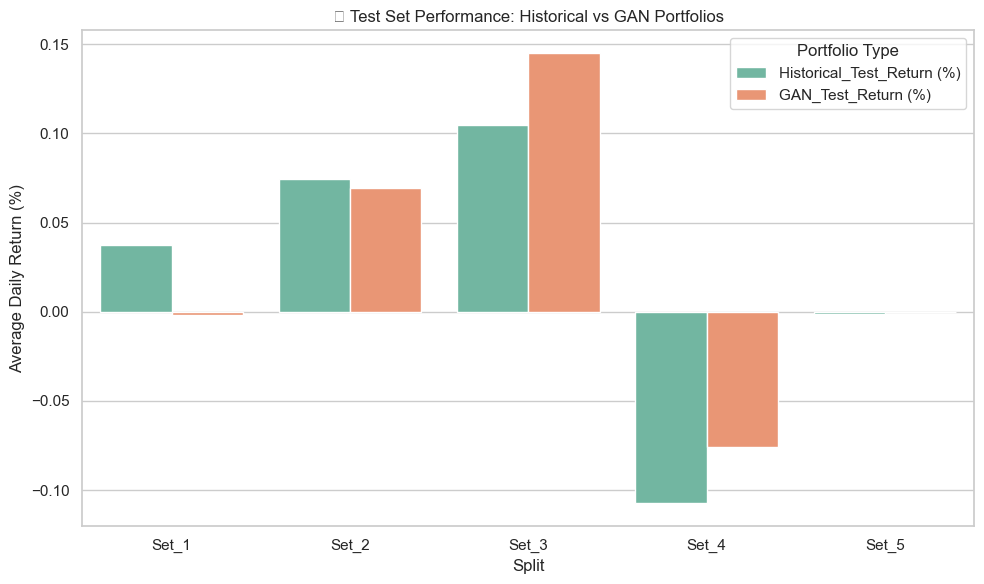

C:\Users\Mohit\AppData\Local\Temp\ipykernel_5232\1978069137.py:41: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  plt.tight_layout()
C:\Users\Mohit\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


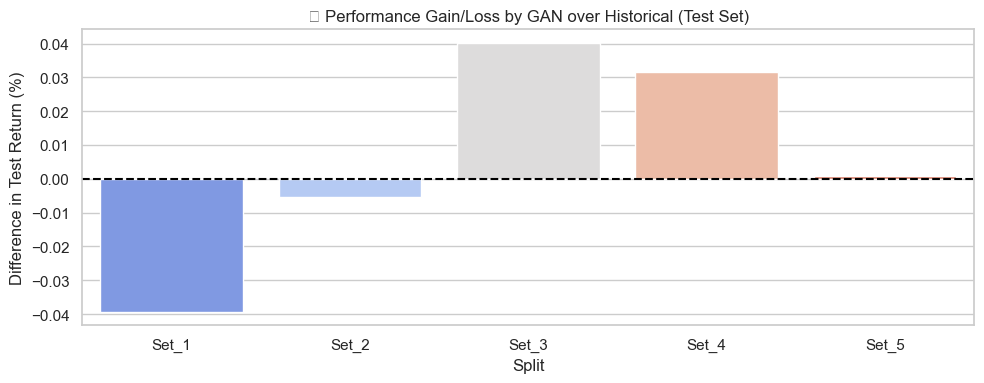

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 📥 Load previously saved results
base_path = "D:/data/All Data/GAN_Multi_Train_Sets"
comparison_df = pd.read_csv(os.path.join(base_path, "test_performance_comparison.csv"))

# 💡 Add performance delta
comparison_df["Return_Difference (%)"] = comparison_df["GAN_Test_Return (%)"] - comparison_df["Historical_Test_Return (%)"]

# 🎨 Nice table view (if in notebook or Jupyter)
styled_table = comparison_df.style.background_gradient(subset=["Historical_Test_Return (%)", "GAN_Test_Return (%)", "Return_Difference (%)"],
                                                       cmap='RdYlGn', axis=0).format({
    "Historical_Test_Return (%)": "{:.2f}",
    "GAN_Test_Return (%)": "{:.2f}",
    "Return_Difference (%)": "{:+.2f}"
})
display(styled_table)

# ✅ 📊 Barplot of test returns
plt.figure(figsize=(10, 6))
df_melt = comparison_df.melt(id_vars="Split", value_vars=["Historical_Test_Return (%)", "GAN_Test_Return (%)"],
                             var_name="Portfolio Type", value_name="Test Return (%)")

sns.barplot(data=df_melt, x="Split", y="Test Return (%)", hue="Portfolio Type", palette="Set2")
plt.title("📈 Test Set Performance: Historical vs GAN Portfolios")
plt.ylabel("Average Daily Return (%)")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

# ✅ 🔺 Delta Bar Plot (GAN - Historical)
plt.figure(figsize=(10, 4))
sns.barplot(data=comparison_df, x="Split", y="Return_Difference (%)", palette="coolwarm")
plt.axhline(0, color='black', linestyle='--')
plt.title("📉 Performance Gain/Loss by GAN over Historical (Test Set)")
plt.ylabel("Difference in Test Return (%)")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


C:\Users\Mohit\AppData\Local\Temp\ipykernel_5232\2501699976.py:24: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
C:\Users\Mohit\AppData\Local\Temp\ipykernel_5232\2501699976.py:25: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.savefig(os.path.join(base_path, "historical_vs_gan_test_returns.png"))  # ✅ Save
C:\Users\Mohit\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


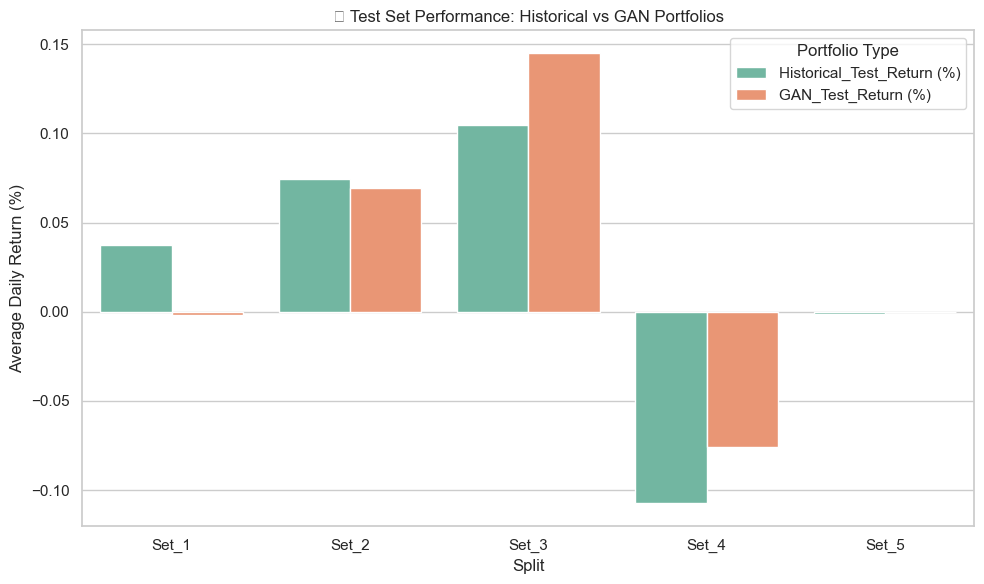

C:\Users\Mohit\AppData\Local\Temp\ipykernel_5232\2501699976.py:35: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  plt.tight_layout()
C:\Users\Mohit\AppData\Local\Temp\ipykernel_5232\2501699976.py:36: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  plt.savefig(os.path.join(base_path, "gan_vs_historical_delta.png"))  # ✅ Save
C:\Users\Mohit\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


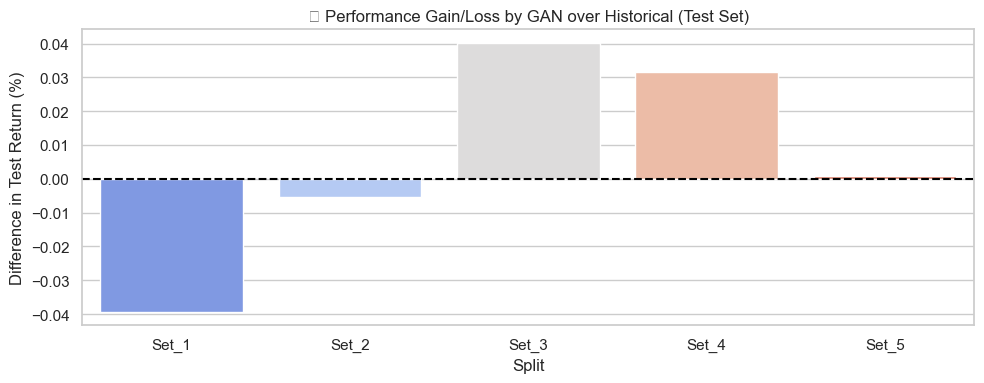

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 📁 Path setup
base_path = "D:/data/All Data/GAN_Multi_Train_Sets"
comparison_df = pd.read_csv(os.path.join(base_path, "test_performance_comparison.csv"))

# ➕ Add delta column
comparison_df["Return_Difference (%)"] = comparison_df["GAN_Test_Return (%)"] - comparison_df["Historical_Test_Return (%)"]

# 🔁 Melt for side-by-side bar plot
df_melt = comparison_df.melt(id_vars="Split",
                             value_vars=["Historical_Test_Return (%)", "GAN_Test_Return (%)"],
                             var_name="Portfolio Type", value_name="Test Return (%)")

# 📊 Barplot: Historical vs GAN returns
plt.figure(figsize=(10, 6))
sns.barplot(data=df_melt, x="Split", y="Test Return (%)", hue="Portfolio Type", palette="Set2")
plt.title("📈 Test Set Performance: Historical vs GAN Portfolios")
plt.ylabel("Average Daily Return (%)")
plt.grid(True, axis='y')
plt.tight_layout()
plt.savefig(os.path.join(base_path, "historical_vs_gan_test_returns.png"))  # ✅ Save
plt.show()

# 📉 Delta bar plot (GAN - Historical)
plt.figure(figsize=(10, 4))
sns.barplot(data=comparison_df, x="Split", y="Return_Difference (%)", palette="coolwarm")
plt.axhline(0, color='black', linestyle='--')
plt.title("📉 Performance Gain/Loss by GAN over Historical (Test Set)")
plt.ylabel("Difference in Test Return (%)")
plt.grid(True, axis='y')
plt.tight_layout()
plt.savefig(os.path.join(base_path, "gan_vs_historical_delta.png"))  # ✅ Save
plt.show()


In [37]:
# ✅ Loop through each of the 5 train-test splits
results = []

for i in range(1, 6):
    # Load test set
    test_df = pd.read_csv(os.path.join(base_path, f"test_set_{i}.csv"), index_col=0)
    
    # Load best historical and GAN portfolios
    hist_df = pd.read_csv(os.path.join(base_path, f"best_portfolio_train_set_{i}.csv"))
    gan_df = pd.read_csv(os.path.join(base_path, f"best_gan_portfolio_train_set_{i}.csv"))
    
    # Extract stock names and weights
    hist_stocks = hist_df.loc[0, ["Stock_1", "Stock_2", "Stock_3", "Stock_4", "Stock_5"]].tolist()
    gan_stocks = gan_df.loc[0, ["Stock_1", "Stock_2", "Stock_3", "Stock_4", "Stock_5"]].tolist()
    gan_weights = gan_df.loc[0, ["Weight_1", "Weight_2", "Weight_3", "Weight_4", "Weight_5"]].tolist()
    
    # Calculate average returns over the test set
    hist_return = test_df[hist_stocks].mean().mean() * 100
    gan_return = (test_df[gan_stocks].mean().values * gan_weights).sum() * 100
    
    results.append({
        "Set": f"Train_Set_{i}",
        "Test_Historical_Return (%)": hist_return,
        "Test_GAN_Return (%)": gan_return
    })

# ✅ Create DataFrame and display
test_comparison_df = pd.DataFrame(results)
print("\n🧪 Test Set Evaluation:\n")
print(test_comparison_df)

# ✅ Save the final results
test_comparison_df.to_csv(os.path.join(base_path, "test_set_return_comparison.csv"), index=False)
print("\n📁 Saved test evaluation to 'test_set_return_comparison.csv'")



🧪 Test Set Evaluation:

           Set  Test_Historical_Return (%)  Test_GAN_Return (%)
0  Train_Set_1                    0.037285            -0.001989
1  Train_Set_2                    0.074631             0.069126
2  Train_Set_3                    0.104925             0.145118
3  Train_Set_4                   -0.107522            -0.076086
4  Train_Set_5                   -0.001035            -0.000356

📁 Saved test evaluation to 'test_set_return_comparison.csv'
